In [ ]:
# Colab에서 Google Drive에 접근 수 있도록 하는 모듈
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install kagglehub

In [ ]:
#중요: 이 셀을 실행해야 kaggle 데이터셋이 이 노트북에 연결됨
# 그 후에는 이 셀을 삭제해도 괜찮음
#주의: 이 노트북은 kaggle 환경과 달라서, kaggle에서 사용 가능한 라이브러리 중 일부는 여기선 설치되지 않았을 수도 있음

#kagglehub는 kaggle 데이터셋을 파이썬에서 다운로드할 수 있게 해주는 외부 라이브러리, 코랩에서는 먼저 설치해줘야 함
import kagglehub
# arindam235/startup-investments-crunchbase라는 kaggle 데이터셋을 현재 작업공간(코랩)에 다운로드하고,
# 그 위치 경로를 변수에 담아 나중에 데이터를 불러올 때 경로로 사용할 수 있게 준비해줌
arindam235_startup_investments_crunchbase_path = kagglehub.dataset_download('arindam235/startup-investments-crunchbase')

print('Data source import complete.')

100%|██████████| 2.67M/2.67M [00:00<00:00, 3.11MB/s]

Extracting files...


Data source import complete.


# 소개

스타트업은 운영 초기 단계에 있는 회사를 말함. 스타트업은 제품이나 서비스를 개발하는 한 명 이상의 기업가가 설립할 수 있음. 스타트업은 일반적으로 비용이 매우 높고 수익이 제한적. 스타트업을 시작하려면 많은 자본이 필요하기 때문에 **벤쳐 캐피털리스트** *(미래에 성장 가능성이 높은 스타트업에 투자하는 사람 또는 회사)*와 같은 다양한 출처에서 자본을 찾음.

스타트업은 자본을 조달하기 위해 여러 차례의 **펀딩** *(외부로부터 자금 유치)*을 거침. 외부 투자자에게 자본 또는 회사 일부 소유권을 대가로 현금을 투자할 수 있는 다양한 **펀딩 라운드** *(스타트업이 특정 시점에서 자금 조달을 받는 회차 또는 단계를 말함. 보통 A, B, C...라운드로 붙음)*가 있음. 다른 유형의 투자는 부채, 전환사채, 주식 또는 배당금이 있음. 스타트업은 처음에 **"시드"펀딩** *(제품이 개발되지 않았거나, 시장에 출시도 안 된 단계에서 받는 초기 자금)*이나 **엔젤 투자자** *(개인 자산가, 아주 초기 스타트업에 자신의 돈으로 투자하는 사람)* 펀딩으로 시작할 수 있음. 다음 펀딩 라운드는 시리즈 A, B, C 등으로 이어질 수 있음, 대부분의 스타트업의 목표는 다른 회사에 인수되거나 상장된 회사가 되는 것.

스타트업의 90%는 제품 시장 적합성, 마케팅 문제, 팀 문제 또는 기타 문제로 인해 실패함. 또한 처음 처음 몇 년 이내에 실패하기도 함. 이로 인해 스타트업 투자는 매우 위험함. 과거에는 **벤쳐 캐피탈리스트**만 스타트업에 투자할 수 있었지만, 최근 **크라우드펀딩** *(인터넷으로 불특정 다수의 사람들로부터 자금을 모으는 방식)* 사이트의 트렌드로 인해 일반 투자자라면 흥미로운 스타트업의 일부를 쉽게 인수할 수 있음.

| 주요 펀딩 라운드 종류                            | 주요 특징                                    |
| --------------------------------- | ---------------------------------------- |
| **Pre-Seed / Seed**               | 아이디어나 프로토타입 단계. 소규모 펀딩 (엔젤 투자자, 초기 펀드 등) |
| **Series A**                      | 제품이 시장에 출시된 후, 사업 모델 검증됨. 본격적 마케팅, 인재 확보 |
| **Series B**                      | 고객 증가, 매출 발생. 본격 확장(글로벌 진출, 조직 확대 등)     |
| **Series C**                      | 안정적 수익 구조 확보. M\&A, 상장 준비, 시장 지배력 확대     |
| **Series D\~H**                   | 대규모 확장, IPO 직전 추가 자금 필요할 때               |
| **IPO (Initial Public Offering)** | 상장 단계. 주식을 공개 시장에 판매함으로써 대규모 자금 유입       |


# 문제

스타트업 투자는 높은 실패율 때문에 매우 위험성이 큰 투자임.
**엔젤 투자자**나 **벤쳐 캐피탈리스트** 같은 사람들은 스타투업에 투자하면서 상당히 높은 리스크를 감수하게 됨.
이 프로젝트에서는 스타트업 투자들이 더 나은 결정을 내릴 수 있도록 지원하기 위해,
스타트업 성공에 영향을 미치는 주요 원인들을 찾아내고, **supervised machine learning methods** *(감독 학습 방법, 정답이 있는 데이터를 가지고, 입출력 간의 관계를 학습해서 새로운 입력이 주어졌을 때 어떤 출력을 낼지 예측하는 방법)*을 통해 기업의 성공 가능성을 예측하는 것을 목표로 함.

# 데이터

머신러닝 모델을 학습하기 위해 Kaggle에 공개된 스타트업 투자 데이터를 사용함. 이 데이터는 초기 단계 스타트업부터 포춘 1000대 기업까지 다양한 기업 정보를 제공하는 선도 플랫폼인 Crunchbase에서 수집된 것.

데이터셋은 약 54,000개의 행과 39개의 열로 구성되어 있었으며, 기업에 대한 정보가 포함되어 있음. 주요 컬럼으로는 회사명, 홈페이지 URL, 시장(Market) 분야, 국가, 주(State), 지역(Region), 도시, 설립일, 첫 투자일, 마지막 투자일 등이 있음.

또한 다음과 같은 다양한 투자 유형에 대한 정보도 포함되어 있음.

seed, venture equity crowdfunding, undisclosed funding, convertible note, debt financing, angel, grant, private equity, post ipo equity, post ipo debt, secondary market, product crowdfunding, round A-H series funding.

각 투자에 대한 상세 설명은 별도로 제공 [설명](https://support.crunchbase.com/hc/en-us/articles/115010458467-Glossary-of-Funding-Types)

또한 각 기업의 상태 정보도 함께 제공되며, 이는 (인수됨, 운영 중, 폐업) 3가지로 구분되어 있음.



---



seed: 시드 라운드는 기업이 설립 초기 단계에 받는 가장 첫 번째 투자 중 하나로, 보통 회사가 아직 작고 시장에서 입지를 확보하려는 시점에 이루어짐.

venture equity crowdfunding: venture 투자(벤쳐 케피털(VC) 회사나 투자자가 고위험 스타트업에 자금을 투자하는 형태)로 주로 Series A, B, C등의 라운드에서 이루어 지며 지분을 받고 투자함. 목표는 기업이 성장한 뒤  상장(IPO)하거나 인수될 때 큰 수익을 얻는 것. equity crowdfunding(지분형 크라우드펀딩은 개인 투자자들이 온라인 플랫폼을 통해 스타트업에 소액 투자할 수 있도록 허용하는 구조, 투자자는 돈을 주는 대신 회사 지분 일부를 갖게 됨.)

undisclosed funding: 투자금의 구체적인 액수나 조건이 공개되지 않은 자금을 의미. 누가 얼마나 어떤 조건으로 투자했는지와 같은 세부 내용이 비공개인 상태.

convertible note: 전환 사채, 다음 라운드의 투자를 받기 전까지 회사를 유지하기 위해 사용하는 '임시(중간)' 자금 조달 방식. 이후 다음 라운드를 성공적으로 유치하면, 이 convertible note는 할인된 가격으로 주식으로 전환됨. 예로 Series A 라운드 이후에 Series B 라운드를 아직 받지 않았을 때 자금을 잠시 메우기 위해 이 방식을 사용. 처음에는 빌린 돈(채권)처럼 쓰다가 나중에 투자 유치 시 주식으로 전환되는 방식.

debt financing: 부채 라운드에서는 투자자가 회사에 돈을 빌려주고, 회사는 나중에 이자까지 더해서 그 돈을 갚겠다고 약속하는 것. 대출 기반 투자.

angel: 엔젤 라운드는 일반적으로 신생 기업이 막 시작할 때 자금을 마련하기 위해 진행되는 소규모 투자 라운드임. 이 단계의 투자자에는 개인 엔젤 투자자, 엔젤 투자자 그룹, 친구, 가족 등이 포함됨. 보통 회사가 제품도 없고 수익도 없을 때 받는 첫 투자. 자기 사비로 잠재력 있는 스타트업에 투자하는 개인. 지인을 통한 투자도 이 라운드에 포함됨.

grant: (보조금, 무상 지원금), 기업, 투자자, 또는 정부 기관이 어떤 기업에 지분을 요구하지 않고 자금을 지원하는 것을 말함.

private equity: **사모펀드** *(소수의 투자자(보통 기관 투자자나 부자 개인)에게서 비공개로 돈을 모아 기업에 투자하는 펀드)* 또는 **헤지펀드** *(고수익을 추구하는 투자 펀드로, 다양한 방식으로 공격적인 투자를 실행함)*가 주도하는 후기 단계의 투자 라운드. 이때 투자는 회사가 더 안정된 상태일 때 이루어지기 때문에 위험도가 낮은 편이며, 투자 규모는 일반적으로 5천만 달러(약 660억 원) 이상임.

post ipo equity: 회사가 이미 상장한 이후에 이뤄지는 추가적인 투자 유치 라운드를 말함.

post ipo debt: 회사가 상장한 이후, 대출 형태로 자금을 조달하는 투자 라운드를 말함.

secondary market: 기존 주주(초기 투자자나 직원)가 가지고 있는 지분(주식)을 다른 투자자에게 파는 거래. 여기서 회사는 직접적으로 돈을 받지 않음. 비공식 거래.

product crowdfunding: 제품 기반 크라우드펀딩 라운드를 말함. 아직 개발 중이거나 출시 전인 제품을 제공하는 조건으로 투자금을 받는 것. 보통 킥스타터나 인디고고 같은 크라우드펀딩 플랫폼에서 이루어짐.

round A-H series funding: 스타트업이 성장 단계에 따라 여러 차례 받는 자금 투자 라운드를 의미.
| 용어                        | 쉽게 설명한 내용 |
|-----------------------------|------------------|
| **Seed (시드 투자)**        | 회사가 막 생겼을 때, 아이디어만 있을 때 받는 첫 투자. 제품도 수익도 없을 때 소액 투자 받음. |
| **Angel (엔젤 투자)**        | 개인(지인, 투자자)이 자기 돈으로 초기 스타트업에 투자. 시드 투자와 비슷함. |
| **Convertible Note (전환사채)** | 지금은 빚처럼 돈을 빌리지만, 나중에 주식으로 바꿔주는 임시 자금 조달 방식. |
| **Debt Financing (부채 투자)** | 투자자가 돈을 빌려주고, 회사가 나중에 이자 붙여서 갚는 구조. 일반적인 대출 형태. |
| **Venture Equity Crowdfunding** | 여러 명이 온라인에서 조금씩 투자하고, 대신 회사 지분(주식)을 나눠 가짐. |
| **Product Crowdfunding**    | 제품을 미리 보여주고 돈을 받은 뒤, 나중에 제품을 보내주는 방식 (예: 킥스타터). |
| **Undisclosed Funding**     | 누가 얼마를 어떤 조건으로 투자했는지 정보가 공개되지 않은 투자. |
| **Secondary Market**        | 기존 주주가 자기 지분을 다른 사람에게 파는 거래. 회사에는 직접 돈이 들어오지 않음. |
| **Round A~H Series Funding**| 회사가 커가면서 단계별로 받는 투자. A, B, C... 순서로 진행됨. |
| **Grant (보조금)**          | 갚을 필요 없는 지원금. 정부나 기업이 지분 요구 없이 자금 지원. |
| **Private Equity (사모펀드)**| 회사가 커진 후 받는 대규모 비공개 투자. 소수 투자자가 큰돈을 넣음. |
| **Post-IPO Equity**         | 회사가 상장한 이후에도 주식을 팔아 추가 자금을 유치하는 투자 라운드. |
| **Post-IPO Debt**           | 상장한 회사가 대출 형태로 자금을 조달함. 이자 붙여서 갚음. |

| 라운드             | 설명                                                                          |
| --------------- | --------------------------------------------------------------------------- |
| **Series A**    | 제품-시장 적합성(Product-Market Fit)이 입증된 뒤, **본격적인 성장 자금** 확보 단계. 보통 수십억\~수백억 단위. |
| **Series B**    | 사업 모델이 안정화된 뒤, **시장 점유율 확대**와 조직 확장을 위한 자금 유치.                              |
| **Series C**    | **글로벌 확장**, 인수합병(M\&A) 준비, 상장 전 마지막 스케일업을 위한 투자.                            |
| **Series D\~H** | 특수한 경우(수익화 실패, 추가 자금 필요 등) 이어지는 라운드. 많아질수록 리스크 또는 대규모 성장 전략을 의미.            |




# 방법론

모델을 학습시키기 전에, 먼저 데이터를 정제하고 모델에 포함시킬 중요한 컬럼들을 선택해야 했음.

이 데이터셋에서 가장 큰 문제 중 하나는 0 값이 매우 많고, 선택할 수 있는 컬럼 수가 지나치게 많음.

또한 status 컬럼에서 약 80%의 기업이 'operating'(운영 중) 상태, 나머지는 closed(폐업) 또는 acquired(인수됨) 상태임.

In [ ]:
# 이 프로젝트에서 사용된 모든 라이브러리들

# 데이터프레임을 생성하고 불러온 CSV 등의 데이터를 표 형태로 다루는 데 사용. 행과 열 단위로 데이터를 조작할 수 있음.
import pandas as pd
# 수학 계산이나 배열 연산에 사용. 머신러닝에서는 수치 데이터 다룰 때 필수.
import numpy as np

# matplotlib보다 통계적인 시각화를 쉽게 해주는 라이브러리. 상관행렬 히트맵(여러 변수들 간의 상관관계를 한눈에 보기 좋게 색깔로 시각화한 표) 그릴 때 유용.
import seaborn as sns
# 정규표현식(문자열 속에서 규칙을 가진 텍스트를 찾아내는 도구)을 이용한 문자열 검색과 치환에 쓰임. 특정 패턴이 포함된 텍스트를 찾는 데 유용.
import re
# 범주형 데이터(성별, 혈액형, 지역 같은 것들)를 숫자로 바꿔주는 클래스. 문자열 데이터는 모델이 이해 못 하니까 숫자로 바꿔줘야 함.
from sklearn.preprocessing import LabelEncoder
# 데이터의 평균을 0, 표준편차를 1로 맞춰주는 정규화(데이터를 일정한 범위(주로 0~1)로 변환하는 작업) 도구.
from sklearn.preprocessing import StandardScaler
# 주성분 분석, 차원 축소 기법, 많은 피처(컬럼)가 있을 때, 이들을 몇 개의 주성분으로 줄이면서도 원래 데이터의 정보를 최대한 보존하려고 할 때 사용.
from sklearn.decomposition import PCA
# 머신러닝 모델의 성능 평가를 위한 지표 중 하나인 혼동 행렬(confusion matrix)을 만들기 위한 함수.
# 혼동 행렬: 분류 모델의 예측 결과를 실제 정답과 비교하여, 모델이 얼마나 잘 맞추었는지 다양한 측면에서 평가할 수 있게 해주는 표.
from sklearn.metrics import confusion_matrix
# train_test_split: 전체 데이터를 학습용(train)과 검증용(test)으로 나누는 함수, 모델이 실제로 얼마나 잘 예측하는지 테스트.
# GridSearchCV: 모델의 성능을 최고로 높일 수 있는 하이퍼파라미터 조합을 찾는 도구.
from sklearn.model_selection import GridSearchCV, train_test_split
# 머신러닝 모델의 성능 평가 지표 4가지를 불러오는 코드.
# accuracy_score: 정확도: 전체 예측 중에서 맞춘 비율. 클래스 불균형이 있을 땐 정확도가 높더라도 신뢰할 수 없음.
# precision_score: 정밀도: 양성(성공)이라고 예측한 것들 중에서 실제로 맞은 비율. 실패를 성공으로 잘못 예측하면 안되는 경우 중요.
# recall_score: 재현율 또는 민감도: 실제 양성 중에서 모델이 얼마나 잘 맞췄는지. 실패를 놓치면 큰일 나는 경우 중요.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 머신러닝 분류 모델의 전반적인 성능을 한눈에 요약해서 보여주는 종합 리포트를 만드는 함수.
from sklearn.metrics import classification_report
# 랜덤 포레스트 분류기를 사용하기 위해 필요한 모듈을 불러오는 코드. 앙상블 학습 방법 중 하나.
# 여러 개의 결정 트리를 만들어 각 트리 결과를 투표 방식으로 결합해 최종 예측 내림.
from sklearn.ensemble import RandomForestClassifier
# 머신러닝 모델의 성능을 향상시키기 위해, 하이퍼파라미터들을 조합해가며 최적의 조합을 찾는 것이 목표. 모든 조합을 다 시도하는 대신, 임의로 일부 조합만 샘플링해서 탐색.
from sklearn.model_selection import RandomizedSearchCV
# K-최근접 이웃 알고리즘. 데이터 간 거리를 기준으로 분류하는 간단하고 직관적인 머신러닝 알고리즘. 예를 들어 가까운 데이터 3개 중 다수가 어떤 클래스에 속하면 그 클래스로 예측함.
from sklearn.neighbors import KNeighborsClassifier
# 다양한 머신러닝 평가 지표(metrics)를 제공하는 모듈. 정확도, ROC AUC 등 여러 평가 함수들을 포함함.
# ROC, AUC:  분류 모델이 얼마나 잘 클래스(양성/음성)를 구분하는지 전체적으로 평가하는 대표적인 성능 지표.
from sklearn import metrics
# 서포트 벡터 머신 분류기. 두 그룹(클래스) 사이를 가장 넓게 벌려주는 '경계선(초평면)'을 찾아주는 머신러닝 알고리즘. 고차원에서의 분류 성능이 좋음.
# 각각의 그룹이 최대한 잘 나뉘도록 선(2차원), 면(3차원), 또는 더 높은 차원의 경계선을 그려주는 방법
from sklearn.svm import SVC
# 위에서 불러온 classification_report와 confusion_matrix를 다시 명시적으로 불러옴.
# classification_report:모델이 예측을 얼마나 잘했는지, 정밀도(precision), 재현율(recall), F1 점수 등 다양한 평가 결과를 표로 한 번에 보여주는 함수
# confusion_matrix: 모델이 맞춘 것과 틀린 것을 표(행렬)로 정리해서 보여주는 함수
# 모델의 성능을 자세히 분석할 수 있도록 도와주는 평가 도구들을 불러오는 코드
from sklearn.metrics import classification_report, confusion_matrix
# metrics 모듈 재호출. 위와 중복되므로 사실상 불필요하긴 하지만, 종종 의도적으로 명시.
from sklearn import metrics
# 데이터 전처리(스케일링, 정규화, 인코딩 등)와 관련된 다양한 도구들이 들어있는 모듈. 머신러닝 모델이 데이터를 더 잘 이해하고 처리할 수 있게 도와줌.
from sklearn import preprocessing

# 그래프와 차트를 그리기 위한 라이브러리. 데이터를 시각적으로 표현할 때 사용.
import matplotlib.pyplot as plt

# 의사결정 나무(Decision Tree) 분류 모델을 만들기 위한 도구. 데이터를 분류하는 데 사용.
from sklearn.tree import DecisionTreeClassifier
# 모델의 성능을 최대화하기 위해 최적의 설정값(하이퍼파라미터)을 자동으로 찾아주는 도구. 여러 조합을 시험해봄.
from sklearn.model_selection import GridSearchCV
# 결정 트리 모델을 그림 파일(.dot)로 저장하는 함수. 트리 구조를 시각화할 때 필요.
from sklearn.tree import export_graphviz

# Jupyter 노트북에서 이미지를 표시하기 위한 도구.
from IPython.display import Image
!pip install pydotplus
# 그래프를 그리거나 파일로 저장할 때 사용.
import pydotplus
# 복잡한 그래프를 쉽게 그릴 수 있게 해주는 시각화 도구 모음.
import graphviz
# 텍스트 데이터를 파일처럼 다루기 위한 도구
from six import StringIO

# 파이썬 2와 3 버전 호환성을 위한 라이브러리. 오래된 코드를 새 버전에서 실행할 때 필요.
import six
# 컴퓨터 시스템과 관련된 기능을 사용하기 위한 모듈. (예: 파일 경로 조작, 환경 변수 접근)
import sys
# sklearn 라이브러리 호환성 문제를 해결하기 위한 코드. 버전 차이로 인한 오류 방지.
sys.modules['sklearn.externals.six'] = six
# six 라이브러리에서 StringIO 기능을 다시 불러옴. 위 호환성 설정과 연결.
from sklearn.externals.six import StringIO

# DOT 형식 텍스트를 실제 그래프 이미지로 변환해주는 함수.
from pydot import graph_from_dot_data
# 데이터 샘플링을 위한 도구. 주로 불균형 데이터 처리에 사용. (예: 100개 데이터 중 50개만 무작위 추출)
from sklearn.utils import resample


# 결정 트리 시각화 함수 중복 임포트. (위에서 이미 불러왔지만 다시 확인하는 의미)
from sklearn.tree import export_graphviz
# 그래프 생성 라이브러리.
import pydot
# 랜덤 숫자 생성 모듈. 무작위 실험을 할 때 사용.
import random

# Jupyter 노트북에서 그래프를 바로 보여주기 위한 설정. 이 코드 없으면 그래프가 별도 창에 뜸.
%matplotlib inline

# 데이터셋 업로드

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/investments_VC.csv", encoding='ISO-8859-1') # 데이터셋 업로드, 인코딩 해주는 코드 추가

In [ ]:
df.head() #상위 5행 출력

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.head().T # 데이터셋 전치(행렬 뒤바꿈)

,0,1,2,3,4
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
homepage_url,http://www.waywire.com,http://enjoyandtv.com,http://www.rockyourpaper.org,http://www.InTouchNetwork.com,NaN
category_list,|Entertainment|Politics|Social Media|News|,|Games|,|Publishing|Education|,|Electronics|Guides|Coffee|Restaurants|Music|i...,|Tourism|Entertainment|Games|
market,News,Games,Publishing,Electronics,Tourism
funding_total_usd,"17,50,000","40,00,000","40,000","15,00,000","60,000"
status,acquired,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA
state_code,NY,CA,NaN,NaN,TX
region,New York City,Los Angeles,Tallinn,London,Dallas


In [ ]:
df.info()
# 데이터프레임 각 열의 데이터 타입, 결측치, 메모리 사용량 등을 요약해서 보여줌.
# date 열이 제대로 읽히지 않아 문자열(object)로 인식되고 있음
# funding_total_usd처럼 숫자여야 할 열도 object로 읽히는 경우, 데이터에 숫자가 아닌 값(문자, 특수문자 등)이 섞여 있을 수 있음
# 이런 열들은 숫자형이나 날짜형으로 변환(전처리)이 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [ ]:
df.shape # 데이터 프레임 크기(행렬 개수)

(54294, 39)

In [ ]:
df.columns # 데이터프레임의 모든 열(컬럼) 이름을 리스트 형태로 보여줌.

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

# 데이터 정제

데이터를 정제하기 위해, 여러 열에서 불필요한 공백을 제거하고, 필요에 따라 “,”(쉼표), “-”(하이픈)과 같은 문자도 삭제함. 숫자가 들어가야 하는 열은 실제로 숫자로 읽히도록 했고, 날짜가 들어간 모든 열은 날짜 데이터 타입으로 변환함.

결측치(null 값)가 있는 행은 삭제했으며, state, city, region, found date와 같이 결측치 비율이 높은 열들은 전체적으로 제거함.

In [ ]:
# 일부 열(column) 이름 앞뒤에 불필요한 공백이 있어서, 공백을 제거해 열 이름을 깔끔하게 만듦.
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

# 'funding_total_usd' 열이 숫자가 아니라 문자(문자열)로 읽혀서, 숫자로 바꿀 수 있도록 정리하는 과정.
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '')  # 숫자에 들어있는 쉼표(,)를 모두 삭제. (예: 1,000 → 1000)
df['funding_total_usd'] = df['funding_total_usd'].str.replace(' ', '')  # 숫자에 들어있는 공백(스페이스)도 모두 삭제.
df['funding_total_usd'] = df['funding_total_usd'].str.replace('-', '0') # 숫자 대신 '-'(하이픈)이 들어간 경우 0으로 바꿔줌. (예: '-' → 0)

df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])  # 이제 이 열을 진짜 숫자(정수/실수)로 변환.

# 날짜가 들어있는 여러 열을 '날짜 데이터'로 변환. (날짜로 인식 못하는 값이 있어도 에러 없이 넘어감)
df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')        # 회사 설립일.
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')  # 첫 투자 날짜.
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')   # 마지막 투자 날짜.
df['founded_year'] = pd.to_datetime(df['founded_year'], format='%Y', errors='coerce')         # 설립 연도.
df['founded_month'] = pd.to_datetime(df['founded_month'], format='%Y-%m', errors='coerce')    # 설립 연월.

# 'market' 열의 값들 앞뒤에 붙은 공백을 모두 제거해서 깔끔하게 만듦.
df.market = df.market.str.strip()


# 분석

데이터셋 분석은 최종 모델에 무엇을 사용하는 것이 중요한지 이해하는 데 매우 중요했음. 또한 모델에 데이터를 사용하기 전에 데이터를 더 잘 이해하는 데 도움이 됨. 아래 분석은 데이터에 대해 수행한 중요한 **탐색적 데이터 분석** *(EDA, 데이터를 본격적으로 분석하거나 모델링하기 전에, 그래프나 통계적 방법을 활용해 데이터의 특성과 구조를 직관적으로 살펴보고 이해하는 과정)* 중 일부를 포함함.

대부분의 회사는 소프트웨어와 생명공학 산업에 속해 있었음. 생명공학 분야가 총 투자금액에서 가장 높은 수치를 기록. 모바일 회사는 총 투자금액에서 두 번째로 낮은 수치를 보임.

많은 회사들이 벤처 및 시드 펀딩을 받음. 시리즈 펀딩 단계가 진행될수록 회사 수는 감소했음. G, H 라운드는 A, B 라운드에 비해 회사 수가 매우 적었음.

인수된 회사와 운영 중인 회사 대부분은 미국에 위치. 인수된 회사는 폐업한 회사와 운영 중인 회사에 비해 평균 및 중앙값 투자금액이 더 높았음. 또한 인수된 회사는 폐업 및 운영 중인 회사보다 더 많은 투자 라운드를 거침.

연도 측면에서, 2014년이 가장 최근 연도였고, 가장 오래된 연도는 1902년. 대부분의 회사는 2000년대 초반에 설립. 총 투자 데이터는 다른 유형의 투자와 마찬가지로 매우 왜곡되어 있었음.

# 탐색적 데이터 분석(EDA)

In [ ]:
# 데이터셋에서 값이 0인 셀(칸)이 각 열마다 몇 개인지 세어줌.
# 일부 열에는 0이 많이 있음.
# 판다스에서 사용하는 함수.
#데이터프레임 안의 각 값이 특정 값(리스트, 딕셔너리 등)에 포함되어 있는지 확인해서, True/False로 이루어진 데이터프레임을 반환.
df.isin([0]).sum()

,0
permalink,0
name,0
homepage_url,0
category_list,0
market,0
funding_total_usd,8531
status,0
country_code,0
state_code,0
region,0


In [ ]:
# 각 열(column)마다 비어있지 않은(결측치가 아닌) 값이 몇 개인지 세어줌.
df.count()

,0
permalink,49438
name,49437
homepage_url,45989
category_list,45477
market,45470
funding_total_usd,49438
status,48124
country_code,44165
state_code,30161
region,44165


In [ ]:
# 각 열(column)마다 중복되지 않는(고유한) 값이 몇 개인지 세어줌.
df.nunique()
# permalink 열이 가장 많은 고유값을 가지고 있는데,
# 이는 이 열이 각 행(데이터)을 구분하는 **고유 ID(식별자)**로 사용하기에 적합함.

,0
permalink,49436
name,49350
homepage_url,45850
category_list,16675
market,753
funding_total_usd,14617
status,3
country_code,115
state_code,61
region,1089


In [ ]:
# 일부 열에 0이 많이 들어 있으므로, 각 열에서 0이 차지하는 비율(%)을 계산함.
(df.isin([0]).sum() / df.count()) * 100

,0
permalink,0.000000
name,0.000000
homepage_url,0.000000
category_list,0.000000
market,0.000000
funding_total_usd,17.255957
status,0.000000
country_code,0.000000
state_code,0.000000
region,0.000000


In [ ]:
# status 열에 어떤 고유한 값(중복 없는 값)들이 들어 있는지 확인.
df['status'].unique()

# status 열에는 세 가지 서로 다른 값이 있음.
# 이 값들(상태)을 예측하는 것이 목표임.

array(['acquired', 'operating', nan, 'closed'], dtype=object)

In [ ]:
# status(상태)별로 회사 이름(name)이 몇 개(고유값)씩 있는지 셈.
df.groupby('status')['name'].nunique()

# 데이터셋에 operating(운영 중) 상태의 회사가 많이 있음.

,name
status,
acquired,3691
closed,2602
operating,41762


In [ ]:
# country_code 열에 중복되지 않는(고유한) 국가 코드가 몇 개인지 확인.
df['country_code'].nunique()

# 총 113개의 고유한 국가 코드가 있음.

115

In [ ]:
# country_code 열에 어떤 고유한 값(서로 다른 국가 코드)들이 들어 있는지 확인.
df['country_code'].unique()

# 다양한 국가 코드(여러 나라)가 포함되어 있음.

array(['USA', 'EST', 'GBR', 'ARG', nan, 'HKG', 'CHL', 'DEU', 'FRA', 'CHN',
       'CAN', 'AUS', 'ROM', 'NLD', 'SWE', 'RUS', 'DNK', 'IND', 'SGP',
       'NOR', 'BEL', 'IRL', 'ITA', 'ISR', 'ESP', 'THA', 'NZL', 'CZE',
       'CHE', 'BRA', 'HUN', 'JPN', 'BWA', 'KOR', 'NGA', 'FIN', 'TUR',
       'CRI', 'PRT', 'TWN', 'KHM', 'COL', 'UKR', 'LTU', 'ZAF', 'AUT',
       'PHL', 'ISL', 'BGR', 'URY', 'HRV', 'KEN', 'MEX', 'JOR', 'VNM',
       'GHA', 'PER', 'POL', 'IDN', 'PAN', 'LVA', 'ALB', 'UGA', 'LBN',
       'GRC', 'ARE', 'PAK', 'EGY', 'SVK', 'LUX', 'MYS', 'BHS', 'ARM',
       'DZA', 'MDA', 'TUN', 'NIC', 'TZA', 'CYP', 'NPL', 'BHR', 'CMR',
       'SRB', 'SAU', 'CYM', 'BRN', 'SLV', 'ECU', 'MLT', 'SVN', 'LAO',
       'TTO', 'MAR', 'MMR', 'BGD', 'DOM', 'BMU', 'LIE', 'MOZ', 'GTM',
       'AZE', 'MCO', 'ZWE', 'UZB', 'OMN', 'BLR', 'JEY', 'JAM', 'KWT',
       'MUS', 'CIV', 'SOM', 'MKD', 'GIB', 'SYC', 'MAF'], dtype=object)

In [ ]:
# country_code(국가 코드)별로 회사 이름(name)이 몇 개(고유값)씩 있는지 세어서,
# 많은 순서대로 정렬한 뒤 상위 50개 국가를 보여줌.
df.groupby('country_code')['name'].nunique().sort_values(ascending=False).head(50)

# 대부분의 데이터(회사)는 미국(USA)에서 나옴.

,name
country_code,
USA,28756
GBR,2642
CAN,1405
CHN,1238
DEU,966
FRA,866
IND,849
ISR,681
ESP,549


In [ ]:
# 데이터프레임의 각 열마다 결측치(null 값)가 몇 개인지 합계를 계산함.
# 일부 열에는 결측치가 많이 포함되어 있음. (예: state code, founded years 등)
df.isnull().sum()

,0
permalink,4856
name,4857
homepage_url,8305
category_list,8817
market,8824
funding_total_usd,4856
status,6170
country_code,10129
state_code,24133
region,10129


In [ ]:
# 각 열(column)마다 결측치(null 값)가 전체 값 중 몇 퍼센트인지 계산함.
df.isnull().sum() / df.count() * 100

# 약 40%의 데이터에 founded date(설립일)가 없음.
# city, region, state 열도 결측치가 많으므로, 이런 열들은 제거하는 것이 좋음.

,0
permalink,9.822404
name,9.824625
homepage_url,18.058666
category_list,19.387822
market,19.406202
funding_total_usd,9.822404
status,12.821046
country_code,22.934450
state_code,80.013925
region,22.934450


In [ ]:
# status(회사 상태)별로 그룹을 나누고, 각 그룹의 funding_total_usd(총 투자금)에 대한 기초 통계(평균, 중앙값, 최댓값 등)를 보여줌.
df.groupby('status')['funding_total_usd'].describe()

# 인수된(acquired) 회사가 폐업(closed) 및 운영 중(operating) 회사보다 평균과 중앙값 투자금이 더 높음.
# 폐업한(closed) 회사가 투자금 총액이 가장 낮음.

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.075578e+07,1.079477e+08,0.0,1100000.0,6000000.0,19500000.0,5.700000e+09
closed,2603.0,7.023194e+06,3.888355e+07,0.0,30000.0,500000.0,4000000.0,1.567504e+09
operating,41829.0,1.295244e+07,1.633604e+08,0.0,50000.0,999857.0,6000000.0,3.007950e+10


In [ ]:
# status(회사 상태)별로 그룹을 나누고, 각 그룹의 funding_rounds(투자 라운드 수)에 대한 기초 통계(평균, 중앙값, 최댓값 등)를 보여줌.
df.groupby('status')['funding_rounds'].describe()

# 인수된(acquired) 회사가 다른 상태(폐업, 운영 중) 회사보다 투자 라운드 수가 더 많음.

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.013814,1.398832,1.0,1.0,2.0,3.0,15.0
closed,2603.0,1.434114,0.965478,1.0,1.0,1.0,2.0,11.0
operating,41829.0,1.689522,1.302072,1.0,1.0,1.0,2.0,18.0


In [ ]:
# 회사 상태(status)별로 여러 투자 관련 열의 평균값을 계산하고, 행과 열을 바꿔서(전치) 보기 쉽게 정리함.
df.groupby('status')[['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].mean().T


status,acquired,closed,operating
funding_rounds,2.013814e+00,1.434114e+00,1.689522e+00
funding_total_usd,2.075578e+07,7.023194e+06,1.295244e+07
seed,1.783670e+05,1.415031e+05,2.275289e+05
venture,1.385521e+07,5.212253e+06,7.194281e+06
equity_crowdfunding,2.406028e+03,0.000000e+00,6.984983e+03
undisclosed,1.559854e+05,3.732560e+04,1.304164e+05
convertible_note,6.423306e+03,1.012430e+04,2.587812e+04
debt_financing,1.905123e+06,6.263045e+05,1.989447e+06
angel,6.677897e+04,7.328595e+04,6.554313e+04
grant,2.570494e+04,5.857066e+04,1.811988e+05


In [ ]:
# 회사 상태(status)별로 여러 투자 관련 열의 중앙값(median)을 계산하고, 행과 열을 바꿔서(전치) 보기 쉽게 정리함.
df.groupby('status')[['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].median().T

# 데이터에 0이 너무 많아서, 중앙값(중간값)만 봐서는 상태별 차이를 잘 알기 어려움.

status,acquired,closed,operating
funding_rounds,2.0,1.0,1.0
funding_total_usd,6000000.0,500000.0,999857.0
seed,0.0,0.0,0.0
venture,5000000.0,0.0,0.0
equity_crowdfunding,0.0,0.0,0.0
undisclosed,0.0,0.0,0.0
convertible_note,0.0,0.0,0.0
debt_financing,0.0,0.0,0.0
angel,0.0,0.0,0.0
grant,0.0,0.0,0.0


In [ ]:
# 회사 상태(status)별로 여러 투자 관련 열의 합계(sum)을 계산하고, 보기 쉽게 행과 열을 바꿔서(전치) 정리함.
df.groupby('status')[['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].sum().T

# 운영 중(operating) 회사는 데이터가 많아서 모든 열의 합계가 높게 나옴.
# 인수(acquired)되거나 폐업(closed)한 회사 중에서는 G, H 라운드까지 간 회사가 없어서, 이 라운드의 투자금 합계가 0임.

status,acquired,closed,operating
funding_rounds,7.435000e+03,3.733000e+03,7.067100e+04
funding_total_usd,7.663035e+10,1.828137e+10,5.417878e+11
seed,6.585308e+08,3.683325e+08,9.517305e+09
venture,5.115343e+10,1.356749e+10,3.009296e+11
equity_crowdfunding,8.883057e+06,0.000000e+00,2.921749e+08
undisclosed,5.758979e+08,9.715853e+07,5.455188e+09
convertible_note,2.371484e+07,2.635356e+07,1.082456e+09
debt_financing,7.033715e+09,1.630271e+09,8.321657e+10
angel,2.465479e+08,1.907633e+08,2.741604e+09
grant,9.490263e+07,1.524594e+08,7.579363e+09


<Axes: >

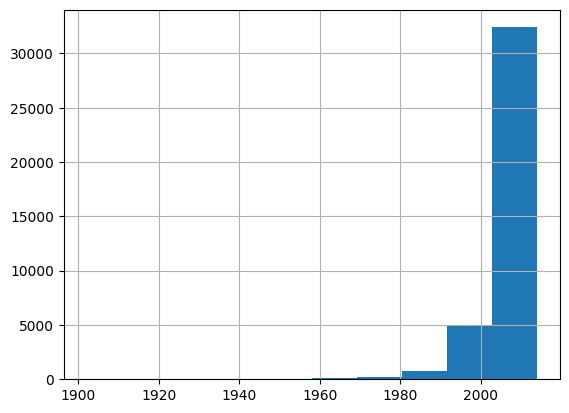

In [ ]:
# founded_year(설립 연도) 열의 데이터를 히스토그램(막대그래프)으로 그려서,
# 각 연도별로 회사가 몇 개 설립됐는지 한눈에 볼 수 있게 함.
df['founded_year'].hist()

In [ ]:
# founded_year(설립 연도) 열에서 가장 최근 연도(최댓값)를 찾음.
df['founded_year'].max()

# 2014년이 데이터에서 가장 최근(최신) 설립 연도임.

Timestamp('2014-01-01 00:00:00')

In [ ]:
# founded_year 열에서 가장 오래된 연도(최솟값)를 찾음.
df['founded_year'].min()

# 데이터에서 가장 오래된 설립 연도는 1902년임.

Timestamp('1902-01-01 00:00:00')

In [ ]:
# market 열에 중복되지 않는(고유한) 시장 종류가 몇 개인지 확인.
df['market'].nunique()

# market(시장) 종류가 총 736개로, 다양한 산업과 분야가 데이터에 포함되어 있음.
# 고유값(unique) 개수는 데이터셋의 상태(전처리 여부, 공백/오타/대소문자 등)에 따라 달라질 수 있음.
# 736, 753

753

In [ ]:
# market(시장)별로 funding_total_usd(총 투자금)를 모두 더해서,
# 투자금이 가장 많은 상위 5개 시장을 내림차순으로 정렬하여 보여줌.
df.groupby('market')['funding_total_usd'].sum().sort_values(ascending = False).head(5)

,funding_total_usd
market,
Biotechnology,7.337295e+10
Mobile,4.947011e+10
Software,4.222348e+10
Clean Technology,3.761994e+10
Health Care,2.946608e+10


In [ ]:
# market(시장)별로 name(회사 이름)의 개수를 세어서,
# 회사 수가 가장 많은 상위 5개 시장을 내림차순으로 정렬해 보여줌.
df.groupby('market')['name'].count().sort_values(ascending = False).head(5)

,name
market,
Software,4620
Biotechnology,3688
Mobile,1983
E-Commerce,1805
Curated Web,1655


In [ ]:
# market(시장)별로 permalink(고유 식별자, 즉 회사 수)의 개수를 세어서,
# 회사가 가장 많은 상위 5개 시장을 내림차순으로 정렬해 보여줌.
df.groupby(df['market'])['permalink'].count().sort_values(ascending = False).head(5)

,permalink
market,
Software,4620
Biotechnology,3688
Mobile,1983
E-Commerce,1805
Curated Web,1655


In [ ]:
# region(지역) 열에 어떤 고유한 값(서로 다른 지역 이름)들이 들어 있는지 모두 확인.
df['region'].unique()

array(['New York City', 'Los Angeles', 'Tallinn', ..., 'Jodhpur',
       'Muenchen', 'Buckinghamshire'], dtype=object)

In [ ]:
# region(지역)별로 회사 이름(name)의 개수를 세어서,
# 회사 수가 가장 많은 상위 10개 지역을 내림차순으로 정렬해 보여줌.
df.groupby('region')['name'].count().sort_values(ascending = False).head(10)

# 주요 대도시(예: 샌프란시스코, 뉴욕, 보스턴, 런던 등)에서 회사가 많이 나옴.

,name
region,
SF Bay Area,6804
New York City,2577
Boston,1837
London,1588
Los Angeles,1389
Seattle,932
"Washington, D.C.",785
Chicago,749
San Diego,700


# 특성 엔지니어링

머신러닝과 통계 모델링에서 원시(raw) 데이터를 모델이 잘 이해하고 예측할 수 있도록 의미 있는 입력값(특성, feature)으로 가공, 변환하는 과정.

마지막 투자 날짜와 첫 투자 날짜 사이의 기간(시간 차이)을 계산하여 새로운 열을 만들었음.

또한 모든 투자(seed, venture, equity crowdfunding, undisclosed, convertible note, debt financing, angel, grant, private equity, post ipo equity, post ipo debt, secondary market, product crowdfunding)를 합산한 총 투자금(total investment) 열도 새로 만듦.

데이터에는 753(736)개의 서로 다른 시장(market) 값이 있었음. 시장 종류가 너무 많았기 때문에, 이 숫자를 줄이고자 함. 시장을 줄이기 위해, crunchbase에서 제공하는 산업 그룹 리스트에 따라 시장을 여러 산업 그룹으로 묶음. 해당 리스트는 [여기](https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-)에서 확인할 수 있음. 새로 만든 Industry Group 열에는 43개의 산업 그룹이 포함되어 있음.

데이터에는 115개국이 포함되어 있었음. 국가 이름과 대륙 정보를 담고 있는 다른 데이터셋과 합쳐서, 대륙 이름을 담은 새로운 열을 만듦.

총 투자금, 투자 연도 차이, 투자 라운드 수, 시드, 벤쳐 등과 같은 수치형 값들은 값의 분포에 따라 'low(낮음)'와 'high(높음)' 같은 범주형 값으로 변환함. 그리고 이렇게 만들어진 범주형 값들은 다시 모델이 이해할 수 있도록 숫자로 변환함.

또한 equity crowdfunding, undisclosed, convertible note, debt financing, angel, private equity, post ipo equity, secondary market, product crowdfunding, round A~H와 같은 다른 열들은 회사가 해당 유형의 투자를 받았는지 여부에 따라 0과 1로 변환함. 이는 해당 열들에 0값이 너무 많았기 때문.

In [ ]:
# 첫 투자 날짜와 마지막 투자 날짜 사이의 기간(며칠 차이인지)을 계산해서 diff_funding 열에 저장.
df['diff_funding'] = df['last_funding_at'] - df['first_funding_at']

In [ ]:
# diff_funding(첫 투자와 마지막 투자 사이 기간) 열의 기초 통계(평균, 최솟값, 최댓값 등)를 보여줌.
df['diff_funding'].describe()

# 평균이 약 312일로, 대략 1년 정도의 차이가 남.

,diff_funding
count,49428
mean,312 days 11:05:24.253459576
std,624 days 19:13:46.845677584
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,382 days 00:00:00
max,17287 days 00:00:00


In [ ]:
# 첫 투자 날짜와 마지막 투자 날짜 사이의 차이를 개월 수(월 단위)로 계산해서 diff_funding_months 열에 저장.
#df['diff_funding_months'] = (df['last_funding_at'] - df['first_funding_at']) / np.timedelta64(1, 'M')

ValueError: Unit M is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

NumPy의 timedelta64는 월(Month) 단위('M')를 지원하지 않음. 월은 일수(28~31일)가 일정하지 않아 모호하기 때문. 따라서 np.timedelta64(1, 'M') 사용이 불가능함.

In [ ]:
# 1. 날짜 데이터가 datetime 형식인지 확인. (필요 시 변환)
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

# 2. 개월 수 차이 계산.
df['diff_funding_months'] = (
    (df['last_funding_at'].dt.year - df['first_funding_at'].dt.year) * 12
    + (df['last_funding_at'].dt.month - df['first_funding_at'].dt.month)
)

In [ ]:
# diff_funding_months(첫 투자와 마지막 투자 사이의 개월 수) 열의 기초 통계(평균, 중앙값, 최솟값, 최댓값 등)를 요약해서 보여줌.
df['diff_funding_months'].describe()

,diff_funding_months
count,49428.000000
mean,10.239985
std,20.489773
min,0.000000
25%,0.000000
50%,0.000000
75%,12.000000
max,568.000000


In [ ]:
# 여러 투자 항목(시드, 벤처, 크라우드펀딩 등)을 모두 더해서
# 각 회사별 총 투자금(total_investment)이라는 새로운 열을 만듦.
df['total_investment'] = (
    df['seed'] + df['venture'] + df['equity_crowdfunding'] + df['undisclosed'] +
    df['convertible_note'] + df['debt_financing'] + df['angel'] + df['grant'] +
    df['private_equity'] + df['post_ipo_equity'] + df['post_ipo_debt'] +
    df['secondary_market'] + df['product_crowdfunding']
)

# 각 회사의 총 투자금(total_investment) 열에 대해
# 평균, 중앙값, 최솟값, 최댓값 등 기초 통계 정보를 요약해서 보여줌.
df['total_investment'].describe()

,total_investment
count,4.943800e+04
mean,1.316667e+07
std,1.535540e+08
min,0.000000e+00
25%,5.000000e+04
50%,1.000000e+06
75%,6.772162e+06
max,3.007950e+10


In [ ]:
# 전체 데이터에서 모든 회사의 총 투자금(total_investment)을 모두 더한 합계를 계산함.
df['total_investment'].sum()

np.float64(650933703144.0)

In [ ]:
# funding_total_usd(총 투자금) 열의 기초 통계(평균, 중앙값, 최솟값, 최댓값 등)를 요약해서 보여줌.
df['funding_total_usd'].describe()

,funding_total_usd
count,4.943800e+04
mean,1.316667e+07
std,1.535540e+08
min,0.000000e+00
25%,5.000000e+04
50%,1.000000e+06
75%,6.772162e+06
max,3.007950e+10


In [ ]:
# funding_total_usd(총 투자금) 열의 모든 값을 더해서 전체 합계를 계산함.
df['funding_total_usd'].sum()

# funding_total_usd의 합계와 total_investment의 합계가 같은지 확인.
# 두 열의 값이 같으면 중복이므로, 한 열은 삭제해도 됨.

np.float64(650933703144.0)

In [ ]:
# 회사 설립일(founded_at)과 첫 투자일(first_funding_at) 사이가 몇 개월 차이인지 계산해서
# diff_first_funding_months 열에 저장.
df['diff_first_funding_months'] = (
    (df['first_funding_at'].dt.year - df['founded_at'].dt.year) * 12 +
    (df['first_funding_at'].dt.month - df['founded_at'].dt.month)
)

In [ ]:
# diff_first_funding_months(설립 후 첫 투자까지 걸린 개월 수) 열의 기초 통계(평균, 중앙값, 최솟값, 최댓값 등)를 요약해서 보여줌.
df['diff_first_funding_months'].describe()

,diff_first_funding_months
count,38547.000000
mean,46.286845
std,111.223852
min,-576.000000
25%,5.000000
50%,18.000000
75%,49.000000
max,2752.000000


In [ ]:
# 기존 데이터프레임(df)를 복사해서 df1이라는 새로운 데이터프레임을 만듦.
df1 = df.copy()

In [ ]:
# 분석이나 모델링에 사용하지 않을 불필요한 열(컬럼)들을 df1에서 삭제(drop)함.
df1 = df1.drop(columns=[
    'homepage_url', 'category_list', 'state_code', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
    'diff_first_funding_months', 'diff_funding', 'funding_total_usd', 'city', 'region', 'first_funding_at', 'last_funding_at'
])

In [ ]:
# permalink, status, name, market, country_code, diff_funding_months 열에 결측치(null 값)가 있는 행(row)은 모두 삭제함.
df1 = df1.dropna(subset=['permalink', 'status', 'name', 'market', 'country_code', 'diff_funding_months'])

In [ ]:
# 각 열(column)마다 남아 있는 결측치(null 값)의 개수를 확인함.
df1.isnull().sum()

,0
permalink,0
name,0
market,0
status,0
country_code,0
funding_rounds,0
seed,0
venture,0
equity_crowdfunding,0
undisclosed,0


In [ ]:
# 데이터프레임 df1의 크기(행 개수, 열 개수)를 튜플 형태로 반환함.
df1.shape

(40471, 29)

In [ ]:
# diff_funding_months(개월 수)를 12로 나누어 연 단위로 변환하고,
# 반올림해서 diff_funding_year(연 단위 차이)라는 새로운 열에 저장.
df1['diff_funding_year'] = round(df1['diff_funding_months'] / 12)

In [ ]:
# diff_funding_year(첫 투자와 마지막 투자 사이의 연 단위 차이)별로
# 회사(permalink) 개수를 세어서, 내림차순으로 정렬 후 상위 50개를 출력.
df1.groupby(df1['diff_funding_year'])['permalink'].count().sort_values(ascending=False).head(50)

,permalink
diff_funding_year,
0.0,26538
1.0,4288
2.0,3708
3.0,1976
4.0,1606
5.0,906
6.0,605
7.0,351
8.0,222


In [ ]:
# market 열의 고유값(서로 다른 시장 종류) 개수를 출력.
print(df1['market'].nunique())  # number of unique market values

# country_code 열의 고유값(서로 다른 국가 코드) 개수를 출력.
print(df1['country_code'].nunique())  # number of unique country codes

736
113


In [ ]:
# 시장(market) 종류가 너무 많아서, 시장을 산업 그룹(Industry Group)으로 묶어 세그먼트(분류) 수를 줄임.
# 어떤 산업 그룹으로 묶을지는 Crunchbase에서 제공하는 산업 그룹 리스트를 참고함.
# (참고 링크: https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-)
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [ ]:
# Industry group(산업 그룹)이라는 새로운 열을 생성함. 특정 산업군 키워드가 포함된 market 값을 기준으로 그룹을 분류함.
import numpy as np
import re

# df1['market'] 컬럼에 특정 키워드가 포함되어 있는지 확인하고, 해당하는 산업 그룹명을 'Industry_Group' 열로 할당함.
# np.where를 중첩 사용하여 우선순위에 따라 일치하는 첫 번째 그룹명으로 분류함.
# re.IGNORECASE 옵션을 통해 대소문자 구분 없이 키워드 탐색 가능함.

# 예: market 컬럼에 'software', 'app', 'education' 등의 키워드가 포함되어 있으면 각각 Software, Apps, Education 등으로 구분됨.

# match되지 않는 경우엔 최종적으로 "Other" 그룹으로 분류.

df1['Industry_Group'] = np.where(
    df1.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
    np.where(
        df1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
        np.where(
            df1.market.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
            np.where(
                df1.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                np.where(
                    df1.market.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps",
                    np.where(
                        df1.market.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence",
                        np.where(
                            df1.market.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology",
                            np.where(
                                df1.market.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel",
                                np.where(
                                    df1.market.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping",
                                    np.where(
                                        df1.market.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle",
                                        np.where(
                                            df1.market.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics",
                                            np.where(
                                                df1.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods",
                                                np.where(
                                                    df1.market.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing",
                                                    np.where(
                                                        df1.market.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                                                        np.where(
                                                            df1.market.str.contains('|'.join(design), flags=re.IGNORECASE), "Design",
                                                            np.where(
                                                                df1.market.str.contains('|'.join(education), flags=re.IGNORECASE), "Education",
                                                                np.where(
                                                                    df1.market.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy",
                                                                    np.where(
                                                                        df1.market.str.contains('|'.join(events), flags=re.IGNORECASE), "Events",
                                                                        np.where(
                                                                            df1.market.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                                                                            np.where(
                                                                                df1.market.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage",
                                                                                np.where(
                                                                                    df1.market.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming",
                                                                                    np.where(
                                                                                        df1.market.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military",
                                                                                        np.where(
                                                                                            df1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                                                                                            np.where(
                                                                                                df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                                                                                                np.where(
                                                                                                    df1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology",
                                                                                                    np.where(
                                                                                                        df1.market.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services",
                                                                                                        np.where(
                                                                                                            df1.market.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments",
                                                                                                            np.where(
                                                                                                                df1.market.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                                                                                                                np.where(
                                                                                                                    df1.market.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                                                                                                                    np.where(
                                                                                                                        df1.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication",
                                                                                                                        np.where(
                                                                                                                            df1.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile",
                                                                                                                            np.where(
                                                                                                                                df1.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio",
                                                                                                                                np.where(
                                                                                                                                    df1.market.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                                                                                                                                    np.where(
                                                                                                                                        df1.market.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                                                                                                                                        np.where(
                                                                                                                                            df1.market.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments",
                                                                                                                                            np.where(
                                                                                                                                                df1.market.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms",
                                                                                                                                                np.where(
                                                                                                                                                    df1.market.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security",
                                                                                                                                                    np.where(
                                                                                                                                                        df1.market.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                                                                                                                                                        np.where(
                                                                                                                                                            df1.market.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate",
                                                                                                                                                            np.where(
                                                                                                                                                                df1.market.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing",
                                                                                                                                                                np.where(
                                                                                                                                                                    df1.market.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering",
                                                                                                                                                                    np.where(
                                                                                                                                                                        df1.market.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                                                                                                                                                                        np.where(
                                                                                                                                                                            df1.market.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability",
                                                                                                                                                                            np.where(
                                                                                                                                                                                df1.market.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation",
                                                                                                                                                                                np.where(
                                                                                                                                                                                    df1.market.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism",
                                                                                                                                                                                    np.where(
                                                                                                                                                                                        df1.market.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                                                                                                                                                                                        np.where(
                                                                                                                                                                                            df1.market.str.contains('|'.join(other), flags=re.IGNORECASE), "Other", "Other"
                                                                                                                                                                                        )
                                                                                                                                                                                    )
                                                                                                                                                                                )
                                                                                                                                                                            )
                                                                                                                                                                        )
                                                                                                                                                                    )
                                                                                                                                                                )
                                                                                                                                                            )
                                                                                                                                                        )
                                                                                                                                                    )
                                                                                                                                                )
                                                                                                                                            )
                                                                                                                                        )
                                                                                                                                    )
                                                                                                                                )
                                                                                                                            )
                                                                                                                        )
                                                                                                                    )
                                                                                                                )
                                                                                                            )
                                                                                                        )
                                                                                                    )
                                                                                                )
                                                                                            )
                                                                                        )
                                                                                    )
                                                                                )
                                                                            )
                                                                        )
                                                                    )
                                                                )
                                                            )
                                                        )
                                                    )
                                                )
                                            )
                                        )
                                    )
                                )
                            )
                        )
                    )
                )
            )
        )
    )
)

<ipython-input-65-06494c8d3957>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
<ipython-input-65-06494c8d3957>:51: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
<ipython-input-65-06494c8d3957>:53: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
<ipython-input-65-06494c8d3957>:55: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Tech

In [ ]:
df1['Industry_Group'].unique()  # Industry_Group(산업 그룹) 열에 들어 있는 고유한 값(서로 다른 산업 그룹 종류)들을 모두 확인.

array(['Content and Publishing', 'Gaming', 'Consumer Electronics',
       'Travel and Tourism', 'Advertising', 'Software',
       'Commerce and Shopping', 'Health Care', 'Real Estate', 'Education',
       'Internet Services', 'Food and Beverage',
       'Media and Entertainment', 'Data and Analytics',
       'Clothing and Apparel', 'Other', 'Biotechnology',
       'Community and Lifestyle', 'Sports', 'Mobile', 'Manufacturing',
       'Design', 'Financial Services', 'Messaging and Telecommunication',
       'Information Technology', 'Professional Services',
       'Administrative Services', 'Navigation and Mapping',
       'Transportation', 'Hardware', 'Privacy and Security',
       'Sales and Marketing', 'Natural Resources', 'Consumer Goods',
       'Events', 'Energy', 'Platforms', 'Apps', 'Science and Engineering',
       'Government and Military', 'Agriculture and Farming',
       'Sustainability', 'Artificial Intelligence'], dtype=object)

In [ ]:
df1['Industry_Group'].nunique()  # Industry_Group(산업 그룹) 열에 들어 있는 서로 다른(고유한) 산업 그룹의 개수를 출력.

43

In [ ]:
# 각 산업 그룹(Industry_Group)별로 회사(permalink)의 개수를 세어서, 내림차순으로 정렬해 보여줌.
# Software(소프트웨어) 산업 그룹이 여전히 회사 수가 가장 많음.
df1.groupby(by=['Industry_Group'])['permalink'].count().sort_values(ascending=False)

,permalink
Industry_Group,
Software,8069
Biotechnology,3494
Health Care,2975
Internet Services,2646
Commerce and Shopping,2267
Information Technology,1983
Mobile,1800
Community and Lifestyle,1610
Advertising,1548


<Axes: >

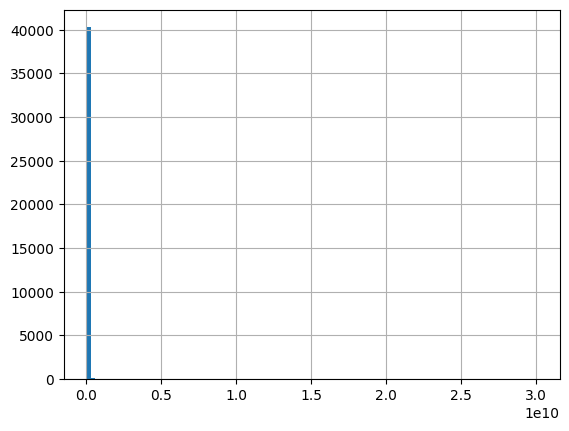

In [ ]:
df1['total_investment'].hist(bins = 100) # 총 투자금의 히스토그램

In [ ]:
country = pd.read_csv('../input/country/country.csv') # country 코드와 continent(대륙)를 매핑하기 위해 데이터셋 업로드
country = country[['Continent_Name', 'Three_Letter_Country_Code', 'Country_Name']]
country = country.dropna(how='any', axis=0)
country.isnull().sum() # 결측치(null 값)가 있는지 확인

country.csv 파일 없어서 대체

In [ ]:
import pandas as pd

# 외교부 국가표준코드 파일 불러오기.
country = pd.read_csv('/content/drive/MyDrive/외교부_국가표준코드_20250102.csv', encoding='cp949')
# 필요한 컬럼만 선택.
country = country[['대륙명_공통 대륙코드', '국제표준화기구(ISO)(alpha3)', '영문명']]
# 컬럼명 영어로 변경.
country.columns = ['Continent_Name', 'Three_Letter_Country_Code', 'Country_Name']
# 결측치 제거.
country = country.dropna(how='any', axis=0)
# 결측치 확인.
country.isnull().sum()


,0
Continent_Name,0
Three_Letter_Country_Code,0
Country_Name,0


In [ ]:
df1 = df1.merge(country, left_on='country_code', right_on='Three_Letter_Country_Code')
# 두 데이터셋(df1과 country)을 병합(merge)해서 continent(대륙) 정보를 포함한 새로운 컬럼을 생성.

df1.columns
# 데이터프레임 df1의 모든 컬럼(열) 이름을 확인.

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment', 'diff_funding_year',
       'Industry_Group', 'Continent_Name', 'Three_Letter_Country_Code',
       'Country_Name'],
      dtype='object')

In [ ]:
df1.groupby(by=['Continent_Name'])['permalink'].count()  # 각 대륙(Continent_Name)별로 회사(permalink) 개수를 집계.
# North America(북아메리카)가 회사 수가 가장 많음.

,permalink
Continent_Name,
Africa,134
America,28575
Asia,3410
Europe,7533
Middle East,796


In [ ]:
df1.shape  # 데이터프레임(df1)의 크기(행 개수, 열 개수)를 확인.

(40448, 34)

array([[<Axes: title={'center': 'funding_rounds'}>,
        <Axes: title={'center': 'seed'}>,
        <Axes: title={'center': 'venture'}>,
        <Axes: title={'center': 'equity_crowdfunding'}>,
        <Axes: title={'center': 'undisclosed'}>],
       [<Axes: title={'center': 'convertible_note'}>,
        <Axes: title={'center': 'debt_financing'}>,
        <Axes: title={'center': 'angel'}>,
        <Axes: title={'center': 'grant'}>,
        <Axes: title={'center': 'private_equity'}>],
       [<Axes: title={'center': 'post_ipo_equity'}>,
        <Axes: title={'center': 'post_ipo_debt'}>,
        <Axes: title={'center': 'secondary_market'}>,
        <Axes: title={'center': 'product_crowdfunding'}>,
        <Axes: title={'center': 'round_A'}>],
       [<Axes: title={'center': 'round_B'}>,
        <Axes: title={'center': 'round_C'}>,
        <Axes: title={'center': 'round_D'}>,
        <Axes: title={'center': 'round_E'}>,
        <Axes: title={'center': 'round_F'}>],
       [<Axes: title=

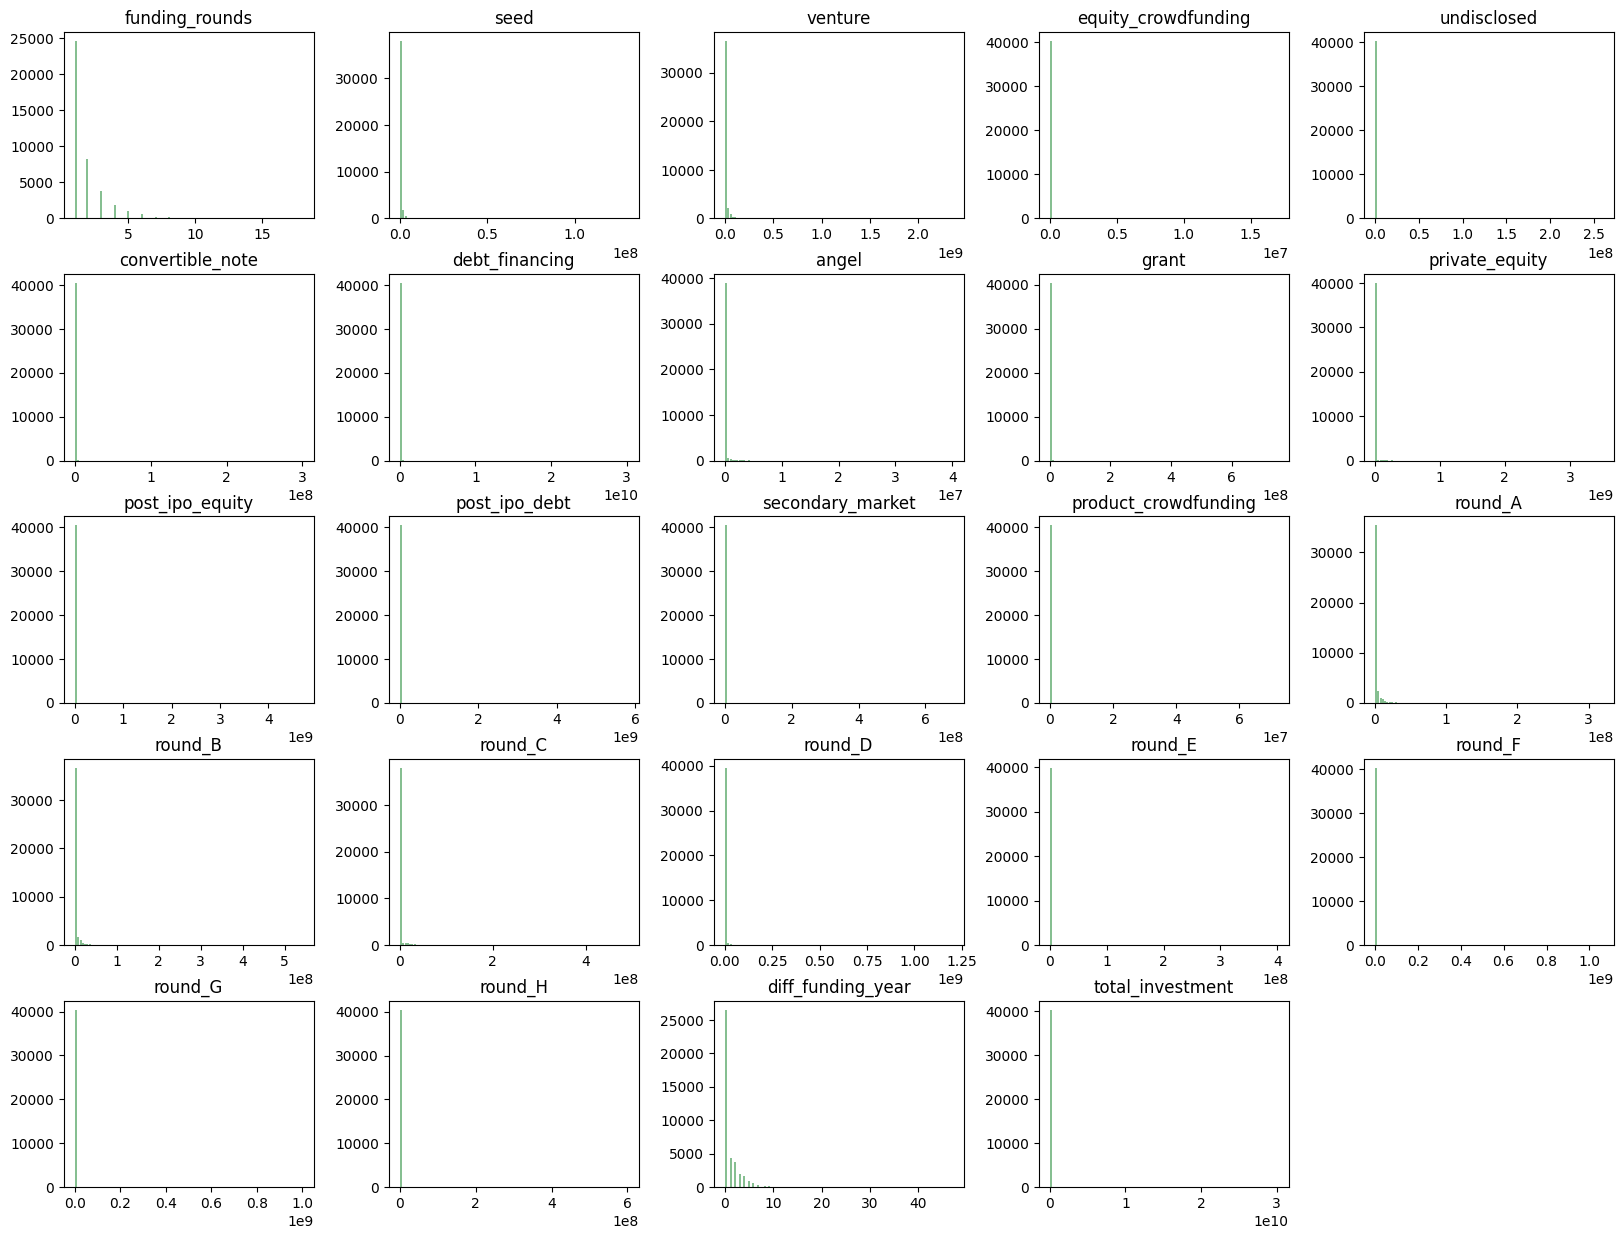

In [ ]:
df1.hist(
    column=[
        'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
        'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
        'private_equity', 'post_ipo_equity', 'post_ipo_debt',
        'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
        'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
        'diff_funding_year', 'total_investment'
    ],
    bins=100, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9
)
# 모든 수치형 컬럼의 히스토그램을 생성함. 모든 값이 매우 왜곡(skewed)되어 있음.

In [ ]:
df1.isin([0]).sum()  # 각 컬럼별로 값이 0인 데이터(0의 개수)를 합산.
# 여전히 0 값이 매우 많음.

,0
permalink,0
name,0
market,0
status,0
country_code,0
funding_rounds,0
seed,29360
venture,19744
equity_crowdfunding,39997
undisclosed,39729


In [ ]:
df2 = df1.copy()  # df1 데이터프레임을 복사해서 df2라는 새로운 데이터프레임을 생성.

In [ ]:
df2 = df2.drop(['Three_Letter_Country_Code', 'Country_Name', 'diff_funding_months', 'country_code', 'market'], axis=1)  # 불필요한 컬럼(열)들을 삭제.

In [ ]:
df2[[
    'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
    'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
    'private_equity', 'post_ipo_equity', 'post_ipo_debt',
    'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
    'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
    'diff_funding_year', 'total_investment'
]].describe().T  # 지정한 수치형 컬럼들의 기초 통계(describe)를 전치(T)해서 행 기준으로 보기 쉽게 출력.

,count,mean,std,min,25%,50%,75%,max
funding_rounds,40448.0,1.792697e+00,1.369890e+00,1.0,1.0,1.0,2.0,1.800000e+01
seed,40448.0,2.356616e+05,1.139202e+06,0.0,0.0,0.0,25000.0,1.300000e+08
venture,40448.0,8.569910e+06,3.083781e+07,0.0,0.0,100000.0,6000000.0,2.351000e+09
equity_crowdfunding,40448.0,5.912667e+03,1.706567e+05,0.0,0.0,0.0,0.0,1.700000e+07
undisclosed,40448.0,1.134976e+05,2.588427e+06,0.0,0.0,0.0,0.0,2.594178e+08
convertible_note,40448.0,2.723159e+04,1.582014e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,40448.0,2.097577e+06,1.518899e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,40448.0,6.832906e+04,5.769450e+05,0.0,0.0,0.0,0.0,4.000000e+07
grant,40448.0,1.782133e+05,6.103959e+06,0.0,0.0,0.0,0.0,7.505000e+08
private_equity,40448.0,2.285071e+06,3.401629e+07,0.0,0.0,0.0,0.0,3.500000e+09


In [ ]:
# describe() 결과를 참고해 수치형 값들을 구간별로 범주(category)화하고, 새로운 컬럼을 생성.
cat_invest = pd.cut(
    df2.total_investment,
    bins=[-1, 112500, 1400300, 8205200, 40079503000],
    labels=['low', 'low_medium', 'high_medium', 'high']
)
# total_investment 값을 describe 결과에 따라 low, low_medium, high_medium, high로 범주화(labeling).

df2.insert(0, 'cat_total_investment', cat_invest)  # cat_total_investment라는 새 컬럼을 맨 앞에 추가.

In [ ]:
cat_diff_funding_year = pd.cut(
    df2.diff_funding_year,
    bins=[-1, 2, 49],
    labels=['low', 'high']
)
# diff_funding_year 값을 describe 결과에 따라 low와 high로 범주화(labeling).

df2.insert(0, 'cat_diff_funding_year', cat_diff_funding_year)  # cat_diff_funding_year라는 새 컬럼을 맨 앞에 추가.

In [ ]:
cat_funding_rounds = pd.cut(
    df2.funding_rounds,
    bins=[-1, 2, 20],
    labels=['low', 'high']
)
# funding_rounds 값을 describe 결과에 따라 low와 high로 범주화(labeling).

df2.insert(0, 'cat_funding_rounds', cat_funding_rounds)  # cat_funding_rounds라는 새 컬럼을 맨 앞에 추가.

In [ ]:
cat_seed = pd.cut(
    df2.seed,
    bins=[-1, 28000, 140000000],
    labels=['low', 'high']
)
# seed 값을 describe 결과에 따라 low와 high로 범주화(labeling).

df2.insert(0, 'cat_seed', cat_seed)  # cat_seed라는 새 컬럼을 맨 앞에 추가.

In [ ]:
cat_venture = pd.cut(
    df2.venture,
    bins=[-1, 85038.5, 6000000, 2451000000],
    labels=['low', 'medium', 'high']
)
# venture 값을 describe 결과에 따라 low, medium, high로 범주화(labeling).

df2.insert(0, 'cat_venture', cat_venture)  # cat_venture라는 새 컬럼을 맨 앞에 추가.

In [ ]:
# 범주형(categorical) 컬럼을 모델에서 사용할 수 있도록 숫자(numerical) 값으로 변환.
df2['cat_status'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
df2['cat_total_investment'] = df2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
df2['cat_diff_funding_year'] = df2['cat_diff_funding_year'].replace(['low', 'high'], [0, 1])
df2['cat_funding_rounds'] = df2['cat_funding_rounds'].replace(['low', 'high'], [0, 1])
df2['cat_seed'] = df2['cat_seed'].replace(['low', 'high'], [0, 1])
df2['cat_venture'] = df2['cat_venture'].replace(['low','medium','high'], [0, 1, 2])

<ipython-input-85-f87212703b04>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['cat_status'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
<ipython-input-85-f87212703b04>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['cat_total_investment'] = df2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
<ipython-input-85-f87212703b04>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version

In [ ]:
# 많은 자금 관련 컬럼들에 0이 많으므로, 이 값들을 0과 1의 새로운 범주형 변수로 변환.
df2.loc[df2['equity_crowdfunding'] < 1, 'cat_equity_crowdfunding'] = 0
df2.loc[df2['equity_crowdfunding'] > 1, 'cat_equity_crowdfunding'] = 1

df2.loc[df2['undisclosed'] < 1, 'cat_undisclosed'] = 0
df2.loc[df2['undisclosed'] > 1, 'cat_undisclosed'] = 1

df2.loc[df2['convertible_note'] < 1, 'cat_convertible_note'] = 0
df2.loc[df2['convertible_note'] > 1, 'cat_convertible_note'] = 1

df2.loc[df2['debt_financing'] < 1, 'cat_debt_financing'] = 0
df2.loc[df2['debt_financing'] > 1, 'cat_debt_financing'] = 1

df2.loc[df2['angel'] < 1, 'cat_angel'] = 0
df2.loc[df2['angel'] > 1, 'cat_angel'] = 1

df2.loc[df2['grant'] < 1, 'cat_grant'] = 0
df2.loc[df2['grant'] > 1, 'cat_grant'] = 1

df2.loc[df2['private_equity'] < 1, 'cat_private_equity'] = 0
df2.loc[df2['private_equity'] > 1, 'cat_private_equity'] = 1

df2.loc[df2['post_ipo_equity'] < 1, 'cat_post_ipo_equity'] = 0
df2.loc[df2['post_ipo_equity'] > 1, 'cat_post_ipo_equity'] = 1

df2.loc[df2['post_ipo_debt'] < 1, 'cat_post_ipo_debt'] = 0
df2.loc[df2['post_ipo_debt'] > 1, 'cat_post_ipo_debt'] = 1

df2.loc[df2['secondary_market'] < 1, 'cat_secondary_market'] = 0
df2.loc[df2['secondary_market'] > 1, 'cat_secondary_market'] = 1

df2.loc[df2['product_crowdfunding'] < 1, 'cat_product_crowdfunding'] = 0
df2.loc[df2['product_crowdfunding'] > 1, 'cat_product_crowdfunding'] = 1

df2.loc[df2['round_A'] < 1, 'cat_round_A'] = 0
df2.loc[df2['round_A'] > 1, 'cat_round_A'] = 1

df2.loc[df2['round_B'] < 1, 'cat_round_B'] = 0
df2.loc[df2['round_B'] > 1, 'cat_round_B'] = 1

df2.loc[df2['round_C'] < 1, 'cat_round_C'] = 0
df2.loc[df2['round_C'] > 1, 'cat_round_C'] = 1

df2.loc[df2['round_D'] < 1, 'cat_round_D'] = 0
df2.loc[df2['round_D'] > 1, 'cat_round_D'] = 1

df2.loc[df2['round_E'] < 1, 'cat_round_E'] = 0
df2.loc[df2['round_E'] > 1, 'cat_round_E'] = 1

df2.loc[df2['round_F'] < 1, 'cat_round_F'] = 0
df2.loc[df2['round_F'] > 1, 'cat_round_F'] = 1

df2.loc[df2['round_G'] < 1, 'cat_round_G'] = 0
df2.loc[df2['round_G'] > 1, 'cat_round_G'] = 1

df2.loc[df2['round_H'] < 1, 'cat_round_H'] = 0
df2.loc[df2['round_H'] > 1, 'cat_round_H'] = 1

In [ ]:
# labelencoder 인스턴스 생성.
labelencoder = LabelEncoder()
# 변수(값)가 많은 두 컬럼에 대해 label encoder를 사용.
df2['cat_Continent_Name'] = labelencoder.fit_transform(df2['Continent_Name'])  # continent(대륙) 컬럼에 label encoder 적용.
df2['cat_Industry_Group'] = labelencoder.fit_transform(df2['Industry_Group'])  # industry group(산업 그룹) 컬럼에 label encoder 적용.

In [ ]:
df3 = df2[[
    'cat_status', 'cat_Industry_Group', 'cat_Continent_Name', 'cat_funding_rounds',
    'cat_diff_funding_year', 'cat_total_investment', 'cat_equity_crowdfunding', 'cat_venture', 'cat_seed',
    'cat_undisclosed', 'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
    'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt', 'cat_secondary_market',
    'cat_product_crowdfunding', 'cat_round_A', 'cat_round_B', 'cat_round_C', 'cat_round_D',
    'cat_round_E', 'cat_round_F', 'cat_round_G', 'cat_round_H'
]]  # 모델에 필요한 컬럼들만 선택해서 새로운 데이터프레임(df3) 생성.

df3.head()  # df3의 상위 5개 행을 출력.

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_equity_crowdfunding,cat_venture,cat_seed,cat_undisclosed,...,cat_secondary_market,cat_product_crowdfunding,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F,cat_round_G,cat_round_H
0,2,11,1,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,1,0,0,2,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,11,3,0,0,0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,9,3,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,42,1,0,0,0,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3.dtypes  # 각 컬럼의 데이터 타입을 확인.
# 모든 컬럼이 숫자형인지(모델에 사용할 수 있는지) 확인.

,0
cat_status,int64
cat_Industry_Group,int64
cat_Continent_Name,int64
cat_funding_rounds,category
cat_diff_funding_year,category
cat_total_investment,category
cat_equity_crowdfunding,float64
cat_venture,category
cat_seed,category
cat_undisclosed,float64


In [ ]:
df3.isna().sum()  # 각 컬럼별로 결측치(null 값)의 개수를 확인.
# 모든 컬럼에 결측치가 없는지 확인.

,0
cat_status,0
cat_Industry_Group,0
cat_Continent_Name,0
cat_funding_rounds,0
cat_diff_funding_year,0
cat_total_investment,0
cat_equity_crowdfunding,0
cat_venture,0
cat_seed,0
cat_undisclosed,0


# 통계와 변수 선택

결정 모델에 어떤 컬럼을 쓸지 정하기 위해 **상관관계 행렬** *(correlation matrix, 데이터에 있는 여러 변수(컬럼)들 사이의 연관성을 한눈에 보여주는 표(행렬))*을 확인함.

상관관계가 낮은 다음 컬럼들은 최종 모델에서 제외하기로 결정함

crowdfunding, undisclosed, convertible note, grant, post ipo equity, post ipo debt, secondary market, product crowdfunding, round G, round H

즉, 이 변수들은 예측에 도움이 되는 상관성이 낮아 최종 모델에 포함하지 않음.

<Axes: title={'center': 'Pearson Correlation of features'}>

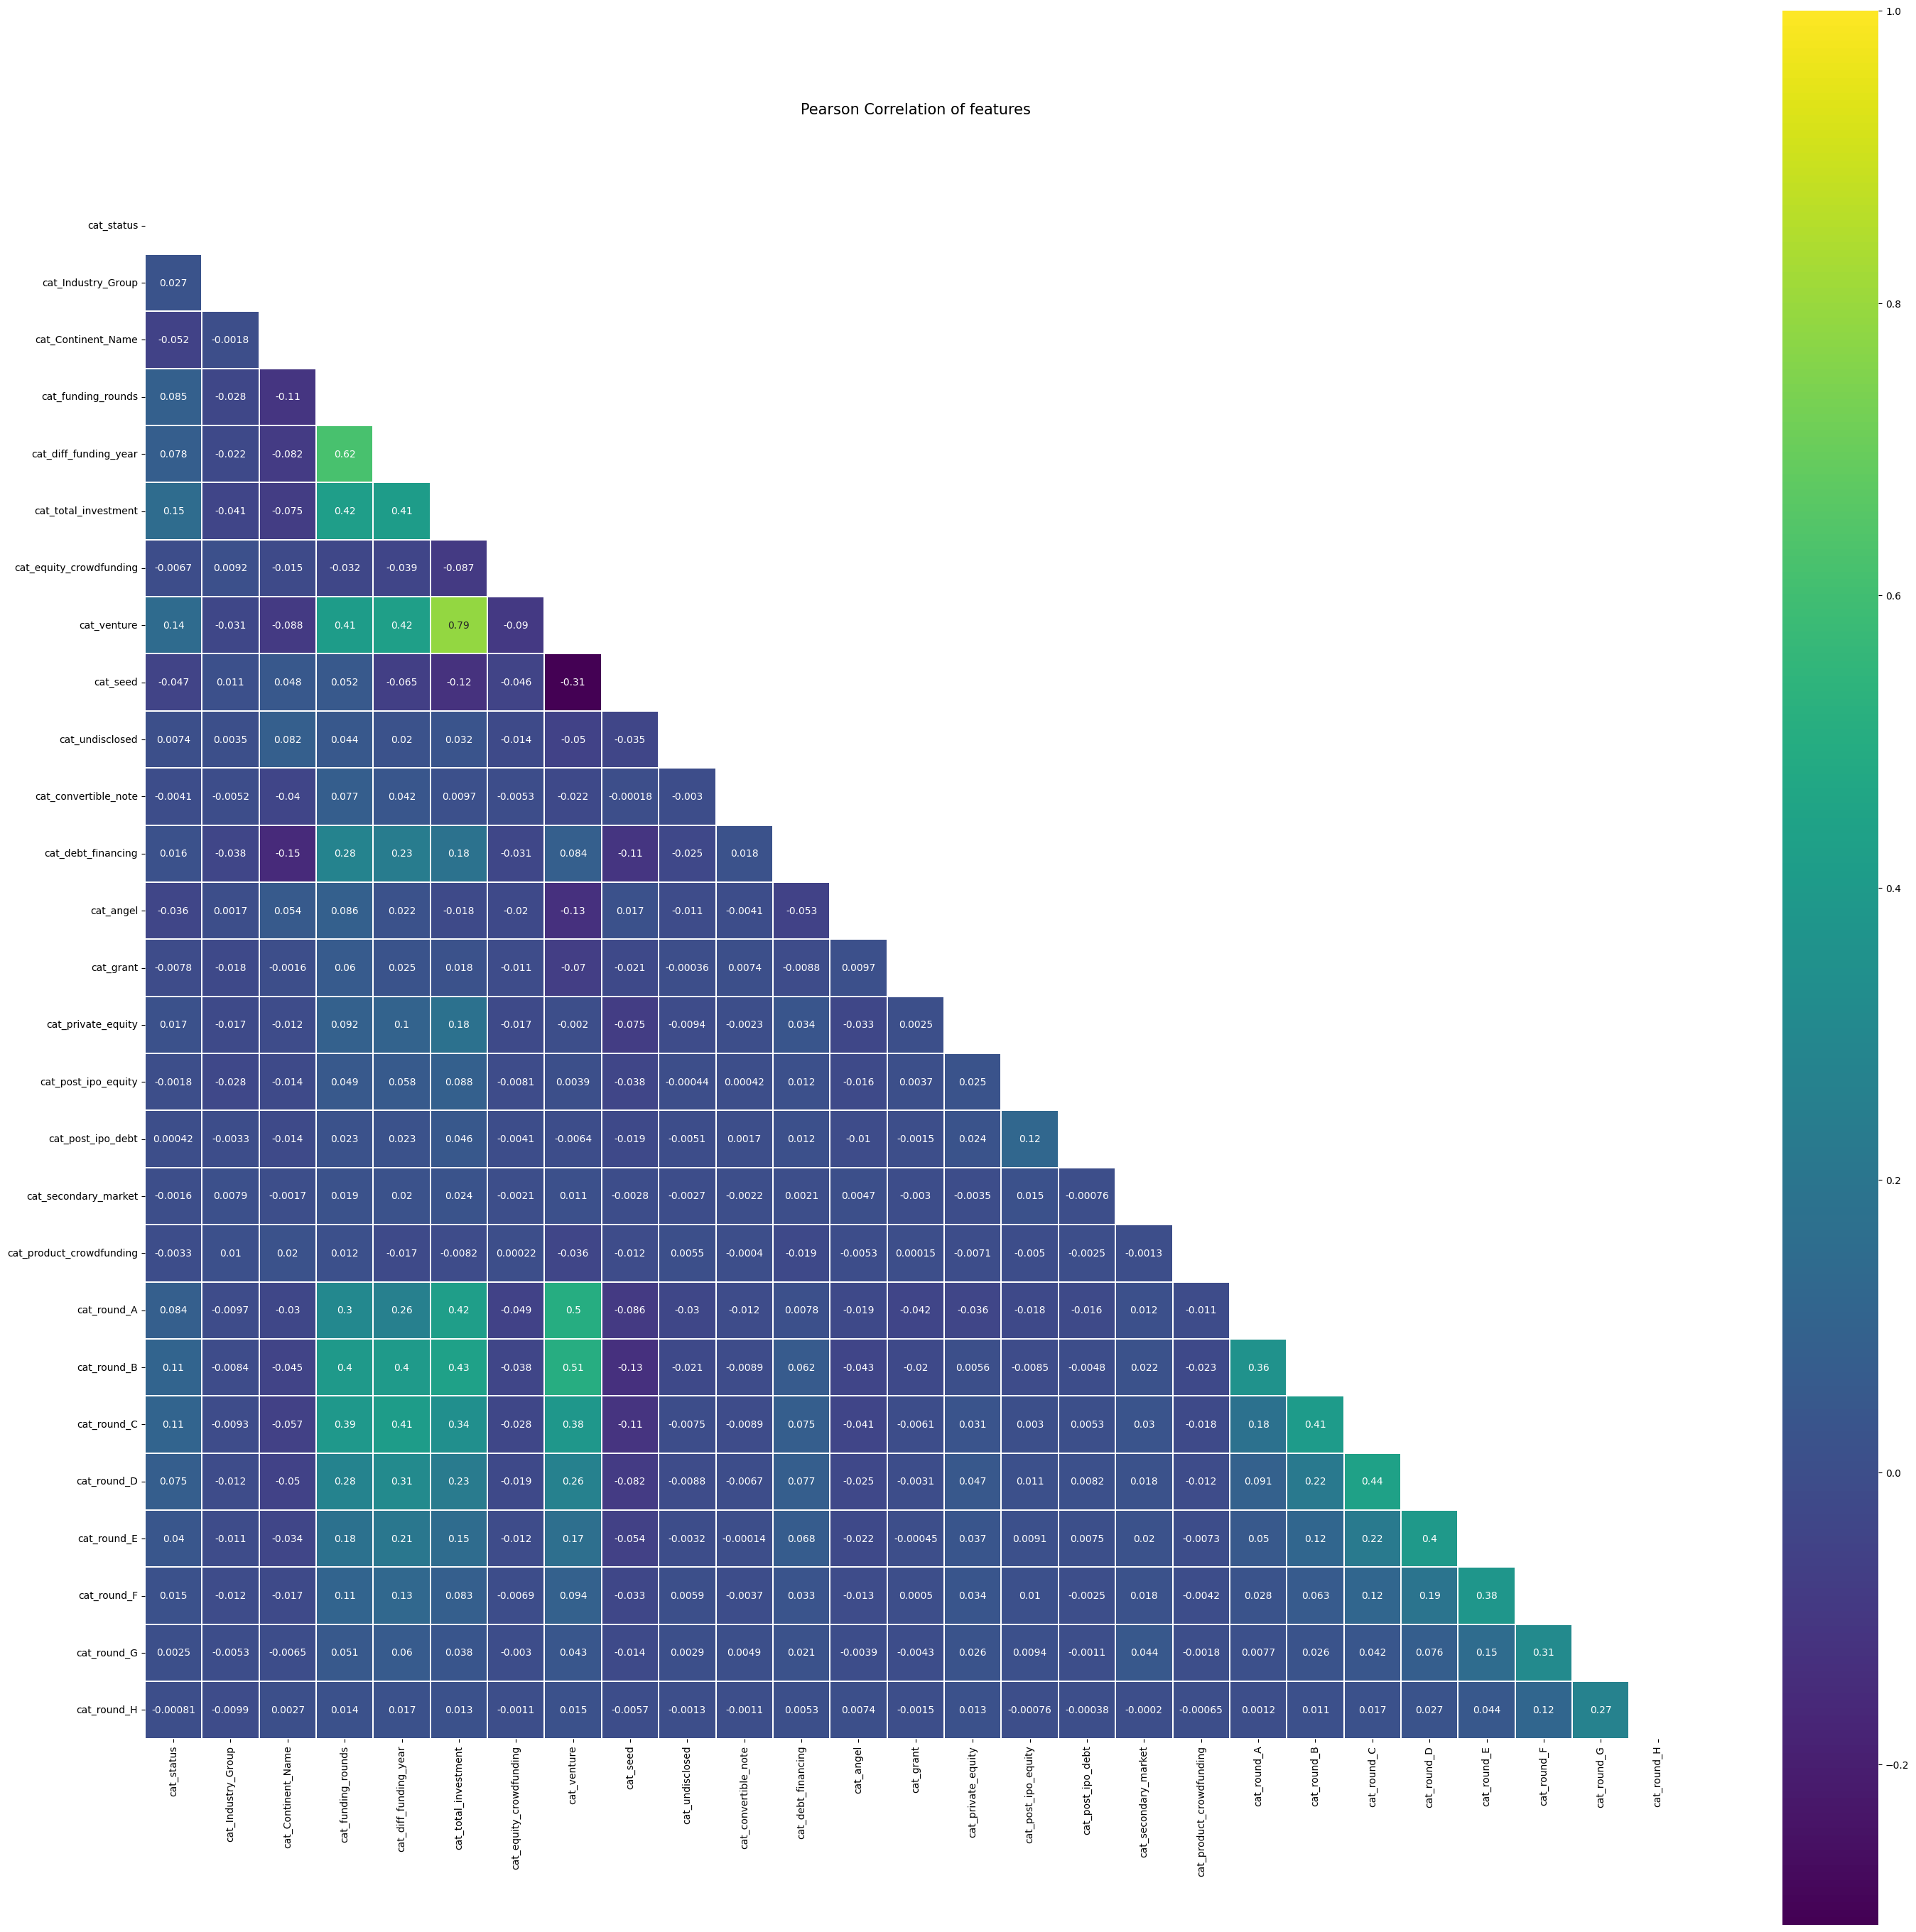

In [ ]:
# 상관관계 행렬 생성.
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df3.corr())
sns.heatmap(df3.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)

# 다음 변수들은 상관관계가 낮아 제거할 수 있음: cat_equity_crowdfunding, cat_undisclosed, cat_convertible_note, cat_grant, cat_post_ipo_equity, cat_post_ipo_debt, cat_secondary_market, cat_product_crowdfunding, cat_round_G, cat_round_H

In [ ]:
df4 = df3[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
           'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
           'cat_private_equity', 'cat_round_A',
           'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
           'cat_round_F']]  # 필요한 컬럼만 선택.
           # 상관관계가 낮은 컬럼들을 제외하고 만든 데이터셋으로, 모델에 사용할 수 있음.

df4.shape  # 데이터셋(df4)의 크기(행 개수, 열 개수)를 확인.

(40448, 17)

In [ ]:
df4.head()  # 데이터셋(df4)의 상위 5개 행을 출력.

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,2,11,1,0,0,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,1,0,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,11,3,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,9,3,0,0,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,42,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 'operating' 값을 제거한 새로운 데이터프레임 생성.
df5 = df3.copy()
df5.drop(df5.index[df5['cat_status'] == 1], inplace=True)
df5 = df5.replace({'cat_status': 2}, 1)  # cat_status가 0과 1만 남도록 변환, 0은 closed, 1은 acquired를 의미.

<Axes: title={'center': 'Pearson Correlation of features'}>

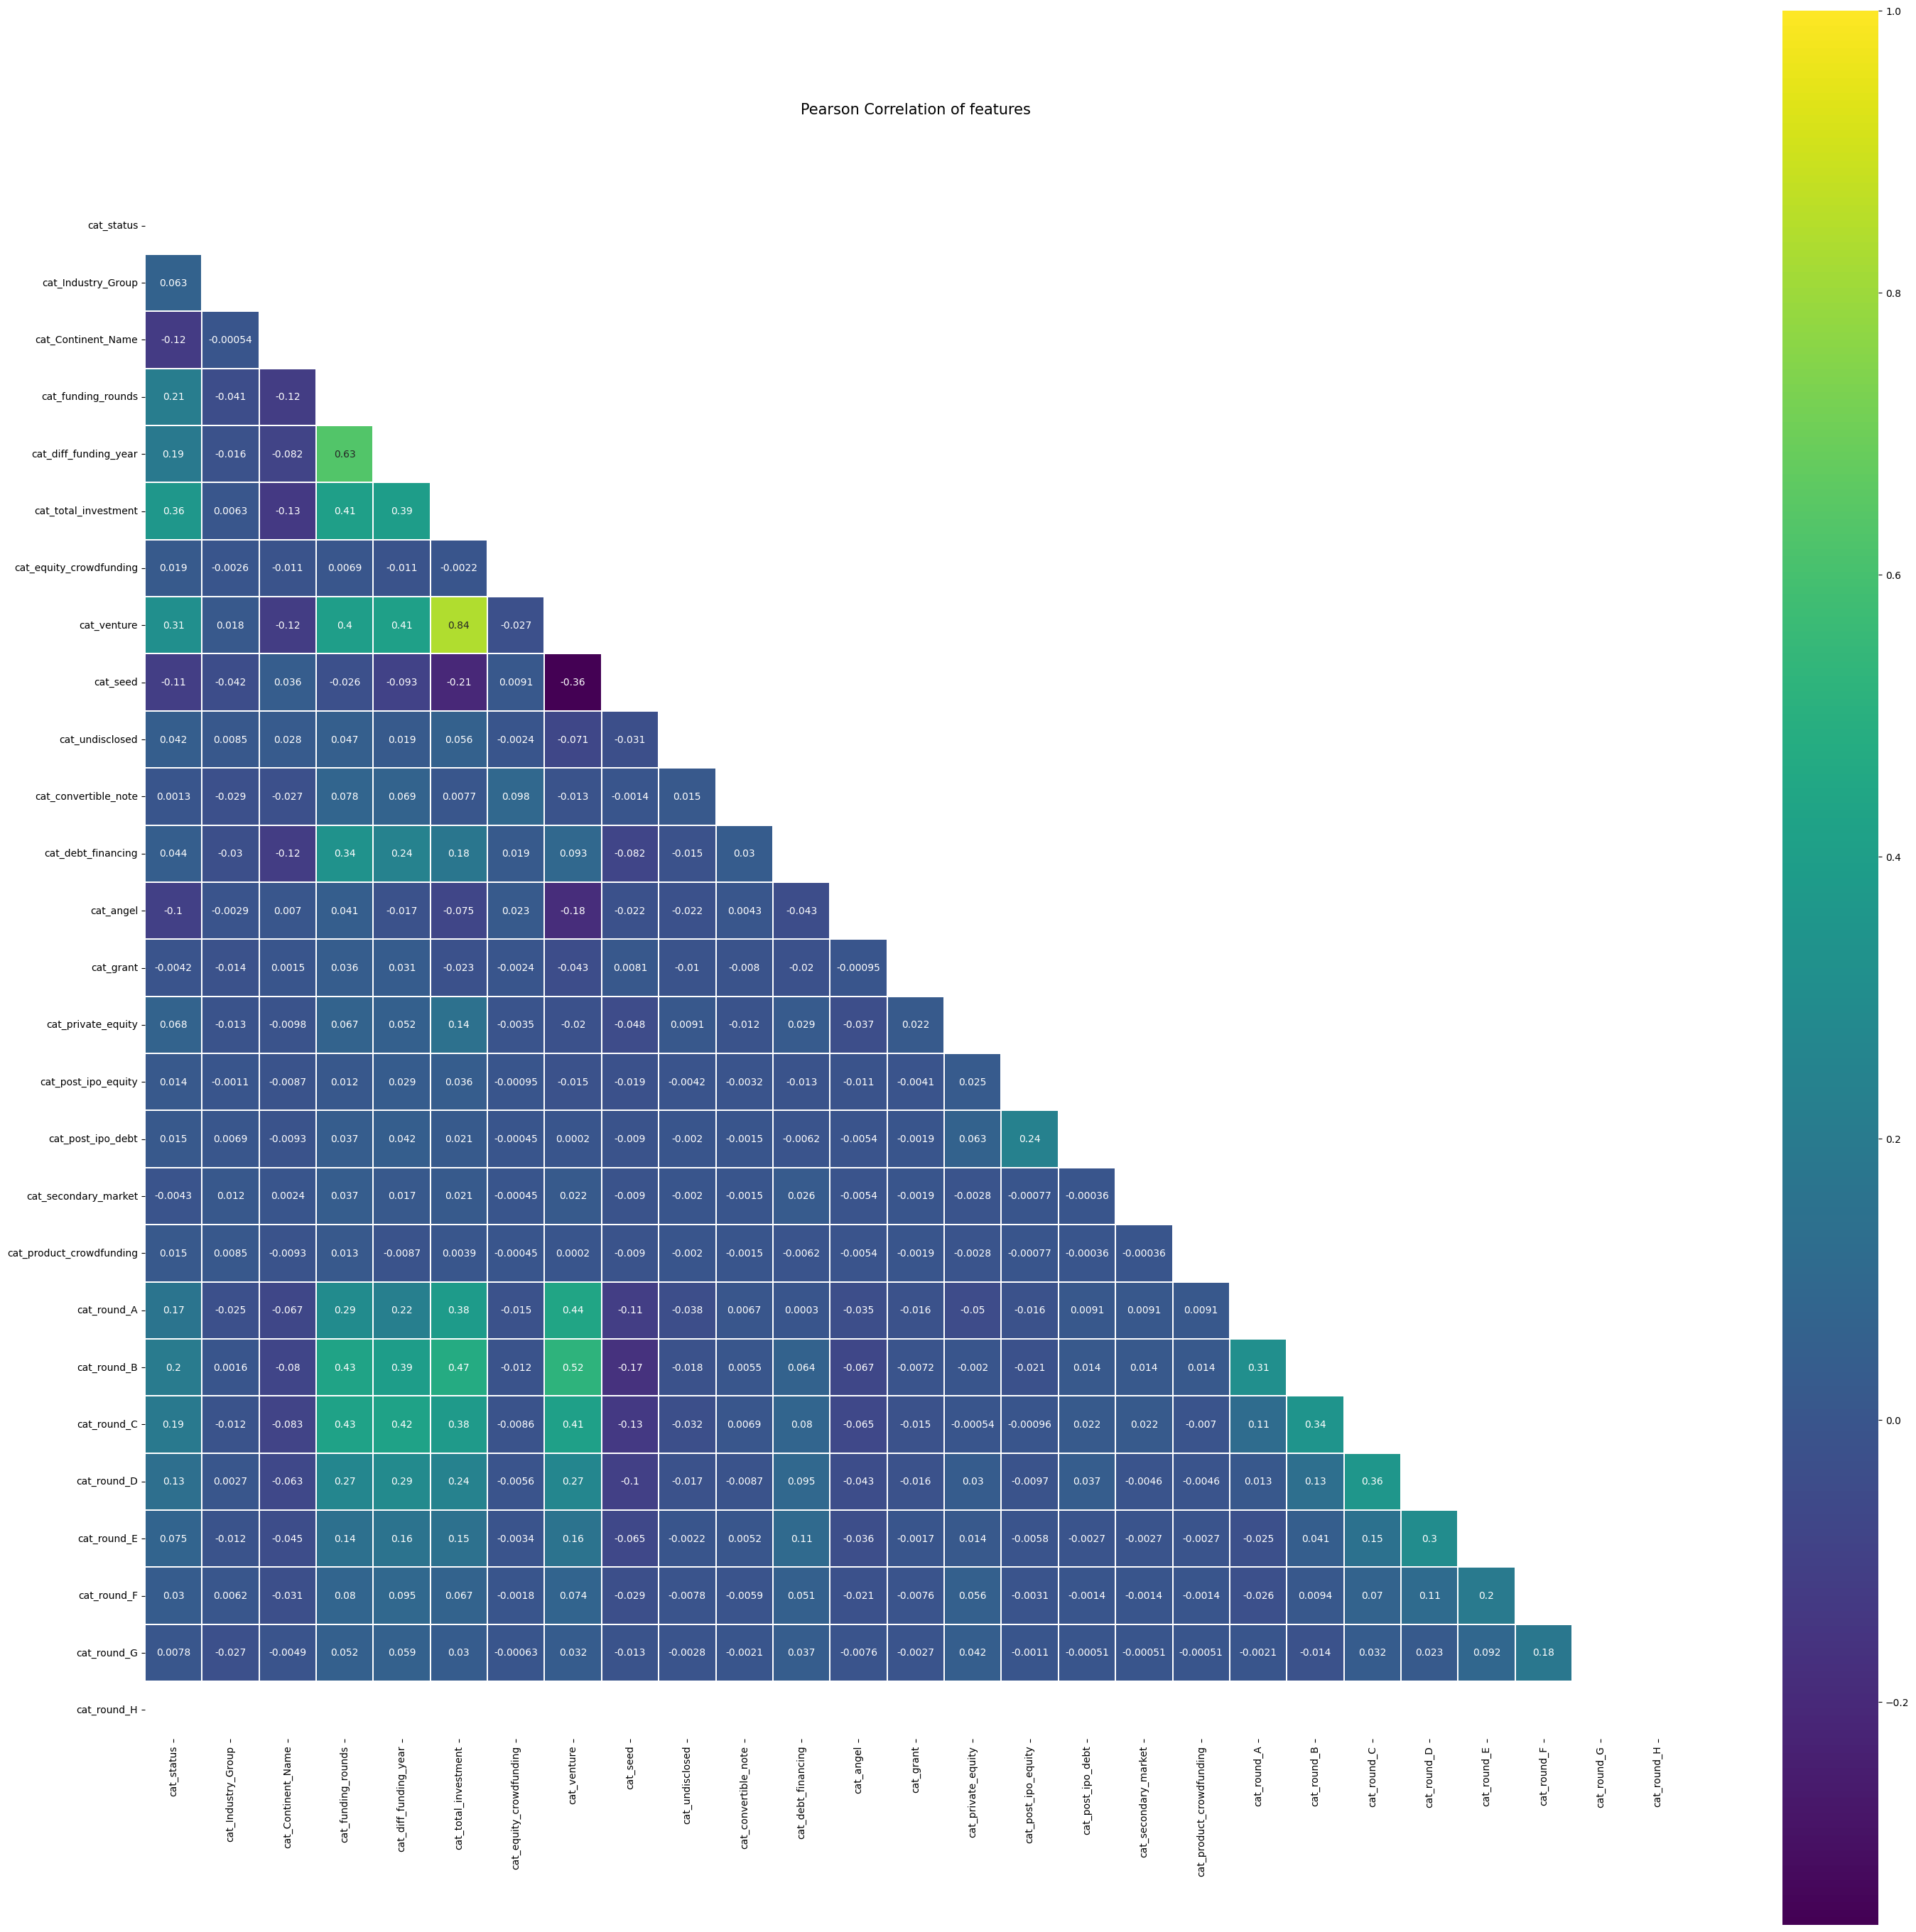

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df5.corr())
sns.heatmap(df5.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)

# 제거 가능한 컬럼: cat_equity_crowdfunding, cat_undisclosed, cat_convertible_note, cat_grant, cat_post_ipo_equity, cat_post_ipo_debt, cat_secondary_market, cat_product_crowdfunding, cat_round_G, cat_round_H (다른 데이터프레임과 동일한 기준)
# venture(벤처 투자)와 total_investment(총 투자금)는 높은 상관관계를 보임.
# 투자 라운드(round_A ~ round_F) 간에도 순차적으로 높은 상관관계가 관찰됨.

In [ ]:
df5 = df5[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
           'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
           'cat_private_equity', 'cat_round_A',
           'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
           'cat_round_F']]  # 상관관계 행렬을 바탕으로 필요한 컬럼만 선택.

In [ ]:
df5['cat_status'].count()  # 회사(기업) 수를 계산.

np.int64(5496)

In [ ]:
df5.shape  # 데이터프레임(df5)의 크기(행 개수, 열 개수)를 확인.

(5496, 17)

df4는 **다중 클래스 분류** *(multiclass classification, 세 가지 이상 중 하나 예측, T/F)*, df5는 **이항 분류** *(binomial classification, 두 가지 중 하나 예측, A/B/C/D)*에 사용할 예정

# 모델

다양한 모델을 사용해 어떤 모델이 가장 적합한지 확인함. 다중 클래스 분류와 이항 분류 모델 모두 테스트함.

다중 클래스 모델에서는 closed, acquired, operating 회사를 예측했고,

이항 분류 모델에서는 closed와 acquired 회사만 예측함.

데이터셋의 80%가 operating 회사로 구성되어 있어, 다중 클래스 모델은 operating 회사를 예측하는 데 강점을 보임.

대부분의 모델에서 20% 데이터를 테스트셋으로 무작위 추출해 결과를 도출함.

모든 모델에 대해 언더샘플링 데이터도 테스트했으나, 편향(bias)이 결과에 포함되어 최종 분석에서는 제외하기로 함.

## 모델 의사결정나무

의사결정나무(Decision Tree)는 내부 노드가 하나의 특성(피처)을 나타내고, 가지(branch)는 결정 규칙을 의미하는 흐름도 형태의 트리 구조. 이 모델은 속성 값에 따라 데이터를 분할하는 방법을 학습함.

의사결정나무를 다중 클래스 분류 모델과 이항 분류 모델 모두에 사용함.

#### 의사결정나무: 다중 클래스 분류

기본값만 사용한 결정 트리 모델은 과적합(overfitting)됨.
트리 가지치기(pruning)에 효과적인 최적의 alpha 값을 찾기 위해 sklearn의 cost_complex_pruning_path를 사용함.
가장 높은 정확도를 보인 alpha 값을 선택해 모델에 적용했고,
추가로 grid search를 통해 모델 튜닝도 진행함.

두 방법(cost_complex_pruning_path와 grid search)으로 튜닝한 모델은 정확도는 동일했지만,
트리 구조가 완전히 달라 서로 다른 분할 규칙과 깊이를 보임.
이는 각 방법이 다른 파라미터 조합으로 최적화되었기 때문.

In [ ]:
Y = df4.cat_status  # 종속 변수(Y) 설정. (예측 대상: 회사 상태)
X = df4.drop('cat_status', axis=1)  # 독립 변수(X) 설정. (예측에 사용할 특성들)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # 데이터를 훈련 세트(80%)와 테스트 세트(20%)로 분할. (랜덤 시드 42로 고정)

In [ ]:
# 각 데이터셋의 크기(행, 열 개수) 확인.
print('Shape of X_train=>', X_train.shape)  # X_train의 크기 출력.
print('Shape of X_test=>', X_test.shape)    # X_test의 크기 출력.
print('Shape of Y_train=>', Y_train.shape)  # Y_train의 크기 출력.
print('Shape of Y_test=>', Y_test.shape)    # Y_test의 크기 출력.

Shape of X_train=> (32358, 16)
Shape of X_test=> (8090, 16)
Shape of Y_train=> (32358,)
Shape of Y_test=> (8090,)


In [ ]:
# 일반(기본) 결정 트리로 테스트.
clf = DecisionTreeClassifier(random_state=100)  # 결정 트리 분류기 생성. (랜덤 시드 100)
clf = clf.fit(X_train, Y_train)  # 결정 트리 분류기를 학습 데이터에 훈련시킴.

In [ ]:
preds = clf.predict(X_test)  # 테스트 데이터에 대한 예측값 생성.

print(accuracy_score(Y_test, preds))  # 테스트 데이터 정확도 출력.
print(accuracy_score(Y_train, clf.predict(X_train)))  # 훈련 데이터 정확도 출력.

print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=['Closed', 'Operating', 'Acquired']))  # 테스트 데이터의 분류 리포트 출력.

# 훈련 데이터셋의 정확도가 매우 높게 나오므로, 모델이 과적합(overfitting)되었을 가능성 있음.

0.8451174289245983
0.8866740836887324

Classification Report

              precision    recall  f1-score   support

      Closed       0.08      0.02      0.03       411
   Operating       0.87      0.97      0.92      7013
    Acquired       0.20      0.06      0.09       666

    accuracy                           0.85      8090
   macro avg       0.39      0.35      0.35      8090
weighted avg       0.78      0.85      0.80      8090



In [ ]:
# 하이퍼파라미터 튜닝 부분 주석 처리. (Kaggle에서 실행 시간이 너무 오래 걸림)
# 실행 시간 너무 오래 걸려서 코드 예시로만 남김. 실행 X.
"""
# 하이퍼파라미터 튜닝
param_dict = {
    "criterion":['gini', 'entropy'],  # 분할 기준 (지니/엔트로피)
    "max_depth": range(1,20),         # 트리 최대 깊이
    "min_samples_split": range(1,20), # 노드 분할 최소 샘플 수
    "min_samples_leaf": range(1,10)   # 리프 노드 최소 샘플 수
}

decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 10,          # 10-폴드 교차 검증
                    verbose = 1,      # 진행 상황 출력
                    n_jobs = -1)      # 모든 CPU 코어 사용

grid.fit(X_train, Y_train)  # 그리드 서치 실행
"""

'\n# 하이퍼파라미터 튜닝\nparam_dict = {\n    "criterion":[\'gini\', \'entropy\'],  # 분할 기준 (지니/엔트로피)\n    "max_depth": range(1,20),         # 트리 최대 깊이\n    "min_samples_split": range(1,20), # 노드 분할 최소 샘플 수\n    "min_samples_leaf": range(1,10)   # 리프 노드 최소 샘플 수\n}\n\ndecision_tree = DecisionTreeClassifier()\ngrid = GridSearchCV(decision_tree,\n                    param_grid = param_dict,\n                    cv = 10,          # 10-폴드 교차 검증\n                    verbose = 1,      # 진행 상황 출력\n                    n_jobs = -1)      # 모든 CPU 코어 사용\n\ngrid.fit(X_train, Y_train)  # 그리드 서치 실행\n'

In [ ]:
# 최적의 그리드 파라미터 찾기.
#grid.best_params_

In [ ]:
#grid.best_estimator_

In [ ]:
# 그리드 서치에서 찾은 파라미터로 모델 생성.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=40)
clf.fit(X_train, Y_train)  # 모델에 학습 데이터 적합.

y_train_pred = clf.predict(X_train)  # 학습 데이터 예측.
y_test_pred = clf.predict(X_test)    # 테스트 데이터 예측.
# 테스트와 학습 데이터의 점수가 더 비슷해짐.

print(accuracy_score(Y_train, y_train_pred), accuracy_score(Y_test, y_test_pred))  # 학습 데이터와 테스트 데이터의 정확도 출력.
print('\nClassification Report\n')
print(classification_report(Y_test, y_test_pred, target_names=['Closed', 'Operating', 'Acquired']))  # 분류 리포트 출력.

0.8634649854749985 0.8668726823238566

Classification Report

              precision    recall  f1-score   support

      Closed       0.00      0.00      0.00       411
   Operating       0.87      1.00      0.93      7013
    Acquired       0.00      0.00      0.00       666

    accuracy                           0.87      8090
   macro avg       0.29      0.33      0.31      8090
weighted avg       0.75      0.87      0.81      8090



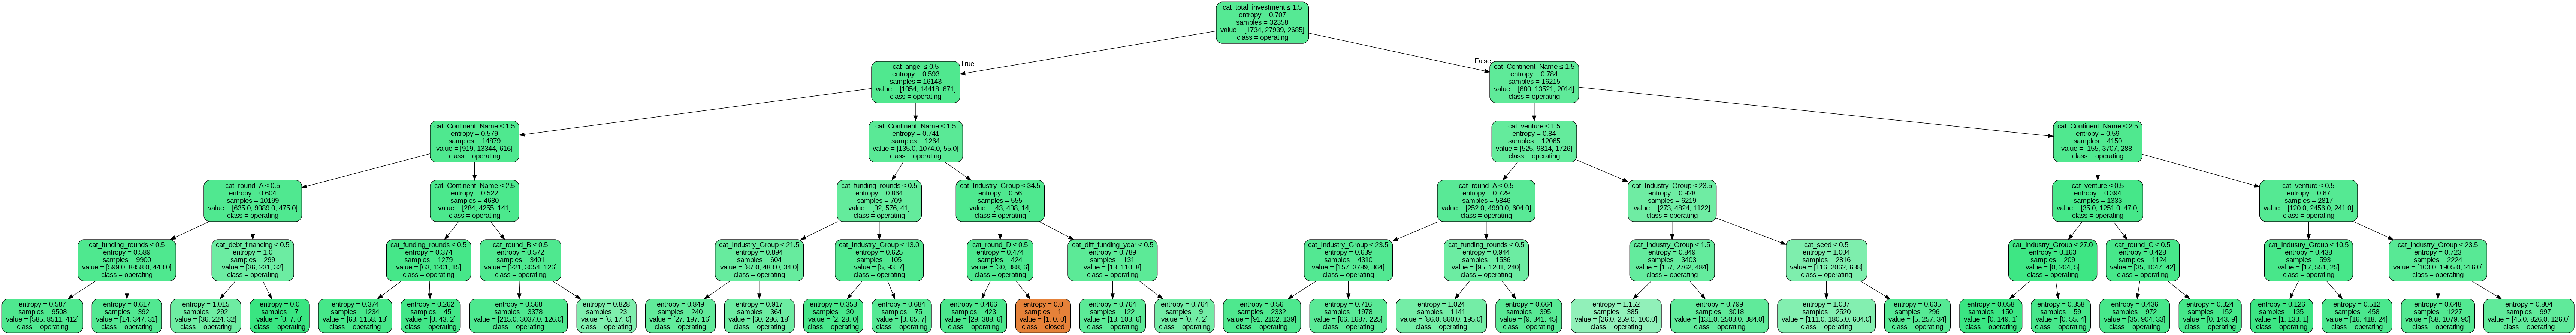

In [ ]:
# 모델의 시각적 표현.
# 예측에 사용되는 입력 데이터(x)에서 타겟 변수('cat_status')를 제외.
xvar = df4.drop('cat_status', axis=1)
# 특성(컬럼) 이름 리스트 추출.
feature_cols = xvar.columns
# DOT 포맷(그래프 설명 언어) 출력을 위한 버퍼 생성.
dot_data = StringIO()
# 결정트리 모델을 DOT 포맷으로 변환하여 dot_data에 저장.
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['closed','operating','acquired'])

# DOT 데이터를 그래프 객체로 변환.
(graph, ) = graph_from_dot_data(dot_data.getvalue())
# 그래프를 PNG 이미지로 생성하여 출력.
Image(graph.create_png())

그리드 서치를 사용해 가장 높은 정확도를 낼 수 있는 특성을 찾으려고 함.
그리드 서치 결과, criterion은 entropy, max depth는 5, min sample leaf는 1, min sample split은 2일 때 가장 좋은 결과가 나옴.
모델에 따르면 total investment(총 투자금), continent name(대륙명), venture(벤처 투자)가 가장 중요한 특성으로 나타남.

In [ ]:
# 비정규화된 특성 중요도 계산. (트리 구조 기반)
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
# 특성 이름과 중요도를 매핑하는 딕셔너리 생성.
feat_imp_dict = dict(zip(feature_cols, clf.feature_importances_))
# 딕셔너리를 데이터프레임으로 변환. (행=특성, 열=중요도)
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
# 컬럼 이름 변경. (0 → 'FeatureImportance')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
# 중요도 상위 6개 특성 추출. (내림차순 정렬)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(6) # 결정트리 분할에 영향을 주는 상위 6개 특성.

,FeatureImportance
cat_total_investment,0.452469
cat_Continent_Name,0.166457
cat_Industry_Group,0.120680
cat_venture,0.105336
cat_round_A,0.064786
cat_funding_rounds,0.031632


동일한 분류 모델을 사용하여, 이제 샘플 데이터셋으로 예측을 시도함.

In [ ]:
# 모델 테스트 및 예측을 위한 샘플 데이터프레임 생성.
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
# 위에서 생성한 데이터를 데이터프레임 형태로 변환하고, 인덱스를 0~4로 지정.
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
sample # 샘플 데이터셋.

,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,21,0,1,1,0,0,1,0,0,0,0,1,1,0,1,1
1,7,4,1,1,3,1,0,0,1,1,0,1,0,1,0,0
2,31,3,1,1,3,2,1,0,0,0,1,1,0,1,0,1
3,39,0,0,1,1,0,0,0,0,1,1,0,1,1,0,1
4,28,1,1,0,2,3,1,1,1,0,1,0,0,0,1,0


In [ ]:
ynew = clf.predict(sample)
ynew # 샘플 데이터셋의 예측값. 0은 closed, 1은 operating, 2는 acquired를 의미.

array([1, 1, 1, 1, 1])

#### 의사결정나무: 이항 분류

이항 분류에서는 폐업(closed)과 인수(acquired)된 회사를 예측하기 위해 결정 트리 모델을 사용.
그리드 서치(Grid Search)를 통해 최적의 하이퍼파라미터를 탐색한 결과,
**지니 불순도** *(Gini criterion, 결정트리에서 데이터가 얼마나 섞여 있는지(불순도)를 측정해, 가장 순수하게 나눌 수 있는 기준을 선택하는 방법)*를 분할 기준으로,
최대 깊이(max_depth)=3, 최소 리프 샘플(min_samples_leaf)=1, 최소 분할 샘플(min_samples_split)=2일 때
가장 높은 정확도를 달성함.

In [ ]:
Y5 = df5.cat_status  # 이 값으로 분류해야 함. (타겟 변수 설정)
X5 = df5.drop('cat_status', axis=1)  # status 컬럼을 제외하고 나머지 특성만 남김.
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size=0.2, random_state=42)  # 훈련/테스트 데이터셋 분할.

In [ ]:
# 작은 결정 트리로 테스트.
clf_pruned5 = DecisionTreeClassifier(criterion = "gini", random_state = 20,
                               max_depth=3, min_samples_leaf=5)  # 단순화를 위해 깊이 3 사용.
clf_pruned5.fit(X_train5, Y_train5)  # 모델 학습.

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=20)

In [ ]:
preds_pruned5 = clf_pruned5.predict(X_test5)
preds_pruned_train5 = clf_pruned5.predict(X_train5)

print(accuracy_score(Y_test5, preds_pruned5)) # 테스트 데이터셋 정확도 출력.
print(accuracy_score(Y_train5, preds_pruned_train5)) # 훈련 데이터셋 정확도 출력.

# 훈련 데이터 정확도가 테스트보다 높아 모델이 과적합(overfitting)되었을 수 있음.

0.6836363636363636
0.704049135577798


In [ ]:
print('\nClassification Report\n') # 분류 리포트 출력.
print(classification_report(Y_test5, preds_pruned5, target_names=['Class 0', 'Class 1']))


Classification Report

              precision    recall  f1-score   support

     Class 0       0.59      0.58      0.59       423
     Class 1       0.74      0.75      0.74       677

    accuracy                           0.68      1100
   macro avg       0.67      0.66      0.67      1100
weighted avg       0.68      0.68      0.68      1100



In [ ]:
# 이 부분은 Kaggle에서 실행 시간이 너무 오래 걸려 주석 처리.
"""
# 그리드 서치를 통한 하이퍼파라미터 튜닝
param_dict = {
    "criterion":['gini', 'entropy'],  # 분할 기준
    "max_depth": range(1,20),         # 트리 최대 깊이
    "min_samples_split": range(1,20), # 노드 분할 최소 샘플 수
    "min_samples_leaf": range(1,10)   # 리프 노드 최소 샘플 수
}

decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 10,          # 10-폴드 교차 검증
                    verbose = 1,      # 학습 과정 출력
                    n_jobs = -1)      # 모든 CPU 코어 사용

grid.fit(X_train5, Y_train5)  # 그리드 서치 실행
"""

'\n# 그리드 서치를 통한 하이퍼파라미터 튜닝\nparam_dict = {\n    "criterion":[\'gini\', \'entropy\'],  # 분할 기준\n    "max_depth": range(1,20),         # 트리 최대 깊이\n    "min_samples_split": range(1,20), # 노드 분할 최소 샘플 수\n    "min_samples_leaf": range(1,10)   # 리프 노드 최소 샘플 수\n}\n\ndecision_tree = DecisionTreeClassifier()\ngrid = GridSearchCV(decision_tree,\n                    param_grid = param_dict,\n                    cv = 10,          # 10-폴드 교차 검증\n                    verbose = 1,      # 학습 과정 출력\n                    n_jobs = -1)      # 모든 CPU 코어 사용\n\ngrid.fit(X_train5, Y_train5)  # 그리드 서치 실행\n'

In [ ]:
#grid.best_params_  # 그리드 서치로 찾은 최적의 하이퍼파라미터.

In [ ]:
#grid.best_estimator_

In [ ]:
# 그리드 서치에서 얻은 파라미터로 모델 실행.
clf_pruned5 = DecisionTreeClassifier(criterion = "gini", random_state = 20,
                               max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf_pruned5.fit(X_train5, Y_train5)

preds_pruned5 = clf_pruned5.predict(X_test5)
preds_pruned_train5 = clf_pruned5.predict(X_train5)
print(accuracy_score(Y_test5,preds_pruned5)) # 테스트 데이터 정확도.
print(accuracy_score(Y_train5,preds_pruned_train5)) # 훈련 데이터 정확도.

# 분류 리포트 출력.
print('\nClassification Report\n')
print(classification_report(Y_test5, preds_pruned5, target_names=['Class 0', 'Class 1']))

0.6836363636363636
0.704049135577798

Classification Report

              precision    recall  f1-score   support

     Class 0       0.59      0.58      0.59       423
     Class 1       0.74      0.75      0.74       677

    accuracy                           0.68      1100
   macro avg       0.67      0.66      0.67      1100
weighted avg       0.68      0.68      0.68      1100



정확도는 0.69로 나타났으며, 폐업(closed)과 인수(acquired)된 회사를 모두 잘 예측하는 결과를 보임.

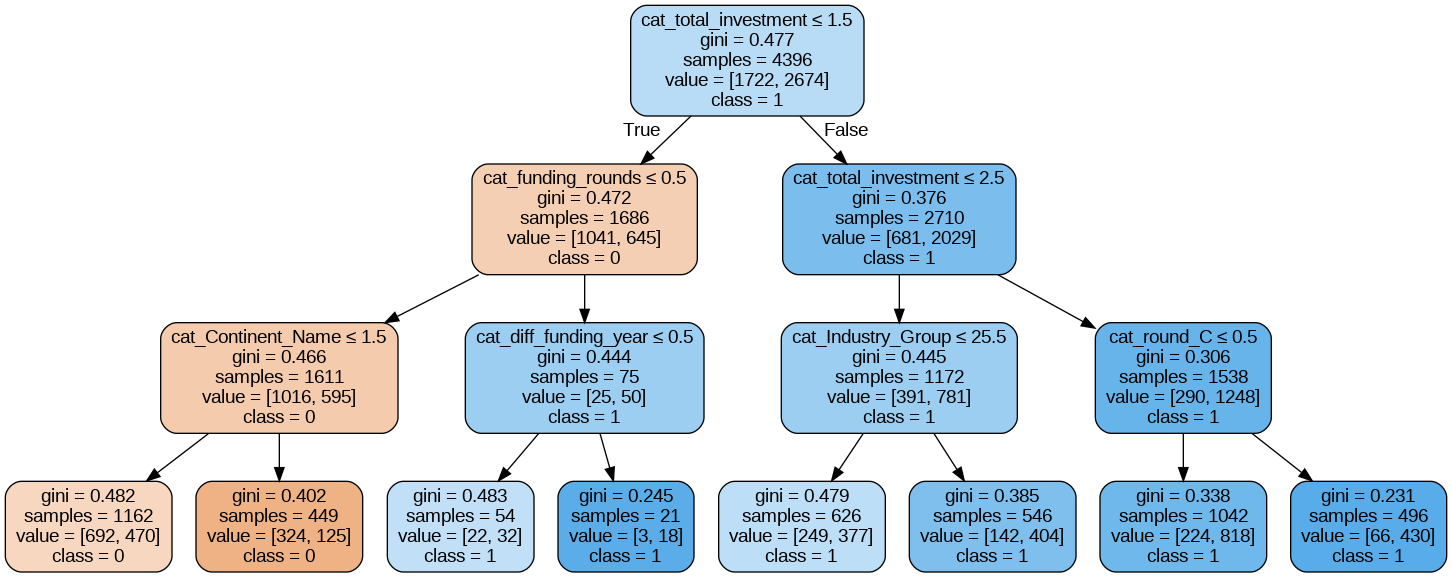

In [ ]:
# 트리 시각화.
xvar5 = df5.drop('cat_status', axis=1)
feature_cols5 = xvar5.columns
dot_data5 = StringIO()
export_graphviz(clf_pruned5, out_file=dot_data5,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols5,class_names=['0','1'])

(graph, ) = graph_from_dot_data(dot_data5.getvalue())
Image(graph.create_png())

이 모델에 따르면, 총 투자금(total investment), 펀딩 라운드(funding rounds), 산업 그룹(industry group), 대륙명(continent name)이 회사의 성공 여부를 판단하는 데 중요한 특성으로 나타남.
모델은 특히 총 투자금이 매우 중요한 요소임을 보여주며, 총 투자금이 적을 경우 회사가 폐업할 가능성이 높다는 것을 시사함.

In [ ]:
# 특성 중요도 계산.
feat_importance5 = clf_pruned5.tree_.compute_feature_importances(normalize=False)
feat_imp_dict5 = dict(zip(feature_cols5, clf_pruned5.feature_importances_))
feat_imp5 = pd.DataFrame.from_dict(feat_imp_dict5, orient='index')
feat_imp5.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp5.sort_values(by=['FeatureImportance'], ascending=False).head() # 결정트리 분할에 영향을 주는 상위 5개 특성.

,FeatureImportance
cat_total_investment,0.882962
cat_funding_rounds,0.036482
cat_Industry_Group,0.031838
cat_Continent_Name,0.029644
cat_round_C,0.012982


이 모델을 사용하여 샘플 데이터셋으로 예측을 시도.

In [ ]:
# 모델 테스트 및 예측을 위한 샘플 데이터프레임 생성.
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
ynew = clf_pruned5.predict(sample)
ynew # 이항 분류 결정 트리 모델로 예측.

array([1, 1, 1, 1, 0])

## 모델: 랜덤 포레스트

랜덤 포레스트(Random Forest)는 여러 개의 개별 결정 트리(Decision Tree)로 이루어진 앙상블(ensemble) 모델.
앙상블 기법이란 여러 모델을 생성하고 이를 결합하여 문제를 해결하는 방법을 의미.
랜덤 포레스트의 경우, 각각의 트리가 예측한 클래스 중에서 가장 많은 표를 받은 클래스가 최종 모델의 예측 결과가 됨.

In [ ]:
Y = df4.cat_status  # 종속 변수(Y) 설정. (예측 대상)
X = df4.drop('cat_status', axis=1)  # 'cat_status' 컬럼 제거 및 독립 변수(X) 설정.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # 훈련 및 테스트 데이터셋 분할. (테스트 비율 20%, 랜덤 시드 42)

In [ ]:
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(X_train, Y_train) # 모델 학습.

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3'])) # 모델이 클래스 2에는 과적합되어 있고, 클래스 1과 3에는 성능이 좋지 않음.

              precision    recall  f1-score   support

     Class 1       0.10      0.01      0.01       411
     Class 2       0.87      0.98      0.92      7013
     Class 3       0.24      0.06      0.10       666

    accuracy                           0.85      8090
   macro avg       0.40      0.35      0.34      8090
weighted avg       0.78      0.85      0.81      8090



Industry Group가 가장 중요한 특성임을 보여줌. 중요한 특성들은 다음과 같음.

In [ ]:
# 수치형 특성 중요도 가져오기.
importances = list(rfc.feature_importances_)
feature_list = list(X.columns)
# 변수와 중요도를 튜플로 리스트화.
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# 가장 중요한 순서대로 특성 중요도 정렬.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# 변수명과 중요도 출력.
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cat_Industry_Group   Importance: 0.51
Variable: cat_Continent_Name   Importance: 0.07
Variable: cat_total_investment Importance: 0.06
Variable: cat_funding_rounds   Importance: 0.04
Variable: cat_diff_funding_year Importance: 0.04
Variable: cat_venture          Importance: 0.04
Variable: cat_debt_financing   Importance: 0.04
Variable: cat_seed             Importance: 0.03
Variable: cat_round_A          Importance: 0.03
Variable: cat_round_B          Importance: 0.03
Variable: cat_round_C          Importance: 0.03
Variable: cat_angel            Importance: 0.02
Variable: cat_private_equity   Importance: 0.02
Variable: cat_round_D          Importance: 0.02
Variable: cat_round_E          Importance: 0.02
Variable: cat_round_F          Importance: 0.01


In [ ]:
# 이 부분은 Kaggle에서 실행 시간이 너무 오래 걸려 주석 처리.
"""
# 랜덤 그리드 설정.
# 랜덤 포레스트의 트리 개수.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# 각 분할 시 고려할 특성 개수.
max_features = ['auto', 'sqrt']
# 트리의 최대 깊이.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# 노드 분할에 필요한 최소 샘플 수.
min_samples_split = [2, 5, 10]
# 리프 노드에 필요한 최소 샘플 수.
min_samples_leaf = [1, 2, 4]
# 각 트리 훈련 시 샘플 선택 방법.
bootstrap = [True, False]

# 랜덤 그리드 생성.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)  # 생성된 랜덤 그리드 파라미터 출력.
"""

"\n# 랜덤 그리드 설정\n# 랜덤 포레스트의 트리 개수\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# 각 분할 시 고려할 특성 개수\nmax_features = ['auto', 'sqrt']\n# 트리의 최대 깊이\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# 노드 분할에 필요한 최소 샘플 수\nmin_samples_split = [2, 5, 10]\n# 리프 노드에 필요한 최소 샘플 수\nmin_samples_leaf = [1, 2, 4]\n# 각 트리 훈련 시 샘플 선택 방법\nbootstrap = [True, False]\n\n# 랜덤 그리드 생성\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)  # 생성된 랜덤 그리드 파라미터 출력\n"

In [ ]:
"""
# 최적 하이퍼파라미터 탐색을 위한 랜덤 그리드 사용.

# 먼저 튜닝할 기본 모델 생성.
rf = RandomForestClassifier()
# 3-폴드 교차 검증을 사용한 랜덤 파라미터 탐색.
# 100개의 서로 다른 조합 탐색 및 모든 CPU 코어 사용.
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
# 랜덤 서치 모델 학습.
rf_random.fit(X_train, Y_train)
"""

'\n# 최적 하이퍼파라미터 탐색을 위한 랜덤 그리드 사용\n\n# 먼저 튜닝할 기본 모델 생성\nrf = RandomForestClassifier()\n# 3-폴드 교차 검증을 사용한 랜덤 파라미터 탐색\n# 100개의 서로 다른 조합 탐색 및 모든 CPU 코어 사용\nrf_random = RandomizedSearchCV(\n    estimator=rf, \n    param_distributions=random_grid, \n    n_iter=100, \n    cv=3, \n    verbose=2, \n    random_state=42, \n    n_jobs=-1\n)\n# 랜덤 서치 모델 학습\nrf_random.fit(X_train, Y_train)\n'

In [ ]:
#rf_random.best_params_ # 최적의 파라미터 찾기.

하이퍼파라미터 튜닝을 위해 랜덤 그리드 서치를 사용했으며, 그 결과
'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True
와 같은 파라미터 조합에서 가장 좋은 성능을 얻었음.
이 파라미터들을 사용했을 때 모델의 정확도는 0.86.

In [ ]:
rfc = RandomForestClassifier(n_estimators = 1600, min_samples_split= 2, min_samples_leaf= 4, max_features= "sqrt", max_depth =10, bootstrap = True, random_state = 42)
rfc.fit(X_train, Y_train)  # 모델 학습.

rfc_pred_test = rfc.predict(X_test)  # 테스트 데이터 예측.
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))  # 분류 리포트 출력.

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       411
     Class 2       0.87      1.00      0.93      7013
     Class 3       0.00      0.00      0.00       666

    accuracy                           0.87      8090
   macro avg       0.29      0.33      0.31      8090
weighted avg       0.75      0.87      0.80      8090



모델을 사용하여 샘플 데이터셋을 예측함.

In [ ]:
# 모델 테스트 및 예측을 위한 샘플 데이터프레임 생성.
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
ynew = rfc.predict(sample)
ynew # 0은 폐업, 1은 운영 중, 2는 인수를 의미함.

array([1, 1, 1, 1, 1])

#### 랜덤 포레스트: 이항 분류

인수(acquired)와 폐업(closed)된 회사만 예측하기 위해서 랜덤 포레스트 모델을 사용. 이전 모델들과 동일한 절차를 따름.

In [ ]:
Y5 = df5.cat_status # y 변수 설정.
X5 = df5.drop('cat_status', axis = 1) # 특성(feature) 설정.
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 42) # 훈련 및 테스트 데이터 분할.

In [ ]:
rfc5 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc5.fit(X_train5, Y_train5) # df5를 사용하여 데이터를 학습.

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
rfc_pred_test5 = rfc5.predict(X_test5) # 테스트 데이터 예측.
print(classification_report(Y_test5, rfc_pred_test5, target_names=['Class 0', 'Class 1']))# 분류 리포트 출력.

              precision    recall  f1-score   support

     Class 0       0.56      0.59      0.57       423
     Class 1       0.73      0.71      0.72       677

    accuracy                           0.66      1100
   macro avg       0.64      0.65      0.65      1100
weighted avg       0.66      0.66      0.66      1100



모델에 따르면 중요한 특성들은 다음과 같음.

In [ ]:
# 수치형 특성 중요도 가져오기.
importances = list(rfc5.feature_importances_)
feature_list = list(X5.columns)
# 변수와 중요도를 튜플로 리스트화.
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# 가장 중요한 순서대로 특성 중요도 정렬.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# 변수명과 중요도 출력.
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Industry group, Total investment, Continent name이 가장 중요한 특성임. 앞으로는 이들만 포함할 수 있음.

Variable: cat_Industry_Group   Importance: 0.39
Variable: cat_total_investment Importance: 0.17
Variable: cat_venture          Importance: 0.08
Variable: cat_Continent_Name   Importance: 0.07
Variable: cat_funding_rounds   Importance: 0.04
Variable: cat_round_B          Importance: 0.04
Variable: cat_diff_funding_year Importance: 0.03
Variable: cat_seed             Importance: 0.03
Variable: cat_debt_financing   Importance: 0.03
Variable: cat_round_A          Importance: 0.03
Variable: cat_angel            Importance: 0.02
Variable: cat_round_C          Importance: 0.02
Variable: cat_private_equity   Importance: 0.01
Variable: cat_round_D          Importance: 0.01
Variable: cat_round_E          Importance: 0.01
Variable: cat_round_F          Importance: 0.0


In [ ]:
# 이 부분은 주석 처리, 실행 시간이 너무 오래 걸림.
"""
# 랜덤 포레스트의 트리 개수.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# 각 분할 시 고려할 특성의 수.
max_features = ['auto', 'sqrt']
# 트리의 최대 깊이.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# 노드 분할을 위한 최소 샘플 수.
min_samples_split = [2, 5, 10]
# 리프 노드의 최소 샘플 수.
min_samples_leaf = [1, 2, 4]
# 각 트리 훈련 시 샘플 선택 방법. (부트스트랩)
bootstrap = [True, False]

# 랜덤 그리드 생성.
random_grid = {
    'n_estimators': n_estimators,        # 트리 개수
    'max_features': max_features,        # 분할 시 특성 수
    'max_depth': max_depth,              # 최대 트리 깊이
    'min_samples_split': min_samples_split,  # 노드 분할 최소 샘플
    'min_samples_leaf': min_samples_leaf,    # 리프 노드 최소 샘플
    'bootstrap': bootstrap                  # 부트스트랩 샘플링 여부
}
print(random_grid)  # 생성된 랜덤 그리드 출력.
"""

"\n# 랜덤 포레스트의 트리 개수.\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# 각 분할 시 고려할 특성의 수.\nmax_features = ['auto', 'sqrt']\n# 트리의 최대 깊이.\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# 노드 분할을 위한 최소 샘플 수.\nmin_samples_split = [2, 5, 10]\n# 리프 노드의 최소 샘플 수.\nmin_samples_leaf = [1, 2, 4]\n# 각 트리 훈련 시 샘플 선택 방법. (부트스트랩)\nbootstrap = [True, False]\n\n# 랜덤 그리드 생성.\nrandom_grid = {\n    'n_estimators': n_estimators,        # 트리 개수\n    'max_features': max_features,        # 분할 시 특성 수\n    'max_depth': max_depth,              # 최대 트리 깊이\n    'min_samples_split': min_samples_split,  # 노드 분할 최소 샘플\n    'min_samples_leaf': min_samples_leaf,    # 리프 노드 최소 샘플\n    'bootstrap': bootstrap                  # 부트스트랩 샘플링 여부\n}\nprint(random_grid)  # 생성된 랜덤 그리드 출력.\n"

In [ ]:
"""
# 최적 하이퍼파라미터 탐색을 위한 랜덤 그리드 사용.

# 먼저 튜닝할 기본 모델 생성.
rf = RandomForestClassifier()
# 3-폴드 교차 검증을 사용한 랜덤 파라미터 탐색.
# 100개의 서로 다른 조합 탐색 및 모든 CPU 코어 사용.
rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=2,  # 학습 과정 상세 출력. (verbose=2)
    random_state=42,
    n_jobs = -1  # 모든 CPU 코어 병렬 처리.
)
# 랜덤 서치 모델 학습.
rf_random.fit(X_train5, Y_train5)
"""

'\n# 최적 하이퍼파라미터 탐색을 위한 랜덤 그리드 사용.\n\n# 먼저 튜닝할 기본 모델 생성.\nrf = RandomForestClassifier()\n# 3-폴드 교차 검증을 사용한 랜덤 파라미터 탐색.\n# 100개의 서로 다른 조합 탐색 및 모든 CPU 코어 사용.\nrf_random = RandomizedSearchCV(\n    estimator = rf, \n    param_distributions = random_grid, \n    n_iter = 100, \n    cv = 3, \n    verbose=2,  # 학습 과정 상세 출력. (verbose=2)\n    random_state=42, \n    n_jobs = -1  # 모든 CPU 코어 병렬 처리.\n)\n# 랜덤 서치 모델 학습.\nrf_random.fit(X_train5, Y_train5)\n'

In [ ]:
#rf_random.best_params_ # 최적의 파라미터.

하이퍼파라미터 튜닝을 위해 랜덤 그리드 서치를 사용했으며,
'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True
와 같은 파라미터 조합에서 가장 좋은 성능을 얻었음.
이 파라미터들을 사용했을 때 모델의 정확도는 0.69.

In [ ]:
'''
# 그리드 서치에서 얻은 파라미터로 모델 생성.
rfc5 = RandomForestClassifier(n_estimators = 200, min_samples_split= 5, min_samples_leaf= 4, max_features= "auto", max_depth =10, bootstrap = True, random_state = 42)
rfc5.fit(X_train5, Y_train5)  # 모델 학습.

rfc_pred_test5 = rfc5.predict(X_test5)  # 테스트 데이터 예측.
print(classification_report(Y_test5, rfc_pred_test5, target_names=['Class 0', 'Class 1']))  # 분류 리포트 출력.

# 정확도는 동일하게 유지되며, 다른 지표(정밀도, 재현율 등)에서 약간의 변동이 있음.
'''

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

max_features="auto" 파라미터 사용으로 발생한 오류. sklearn 1.2 버전부터 auto는 더 이상 유효한 값이 아님.

In [ ]:
# 'auto' -> 'sqrt'로 변경.
rfc5 = RandomForestClassifier(
    n_estimators = 200,
    min_samples_split= 5,
    min_samples_leaf= 4,
    max_features= "sqrt",  # 'sqrt'로 수정.
    max_depth =10,
    bootstrap = True,
    random_state = 42
)

이 모델을 사용하여 샘플 데이터프레임을 예측함.

In [ ]:
# 모델 테스트 및 예측을 위한 샘플 데이터프레임 생성.
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])

In [ ]:
ynew = clf_pruned5.predict(sample)
ynew # 이항 분류 결정 트리 모델로 예측. 0은 폐업(closed), 1은 인수(acquired)를 의미.

array([1, 1, 1, 1, 1])

# 결론

산업군, 대륙, 총 투자금이 중요한 특성으로 나타남.

다중 클래스 분류에서는 SVM과 랜덤 포레스트를 사용했을 때 가장 좋은 결과를 얻었고, 이항 분류에서는 랜덤 포레스트를 사용했을 때 가장 좋은 결과를 얻음.

앞으로는 폐업 및 인수된 회사에 대한 더 많은 데이터를 확보하고, 원-핫 인코딩을 적용해 모델을 테스트하며, 나이브 베이즈와 XG Boost 같은 다른 모델들도 실험해볼 계획.

또한 이항 분류 모델에 KNN과 SVM도 적용해볼 예정.

Crunchbase API를 활용해 실시간 대시보드를 만들고 모델을 배포하여 투자자와 창업자들이 활용할 수 있도록 하는 것도 미래의 목표.